# Original Documentation/Tutorial

Other potential solutions,

[network x](https://networkx.org/)

[SNAP](https://snap.stanford.edu/snappy/)

[graph-tool](https://github.com/imohitmayank/jaal)

[pyvis](https://pyvis.readthedocs.io/en/latest/index.html)

[igraph](https://igraph.org/)

## TODOs

In [1]:
# //TODO - Modify code to show available train routes
# //TODO - Modify code to stop using highway signals, and use railway block occupancys
# //TODO - Modify code to reflect less frequent traffic like trains
# //TODO - Modify code to reflect train length

In [2]:
# For testing, delete once package is pushed
import sys
from pathlib import Path

sys.path.insert(0, str(Path(sys.path[0]).parent / 'src'))

In [3]:
# Traffic Simulator Library
from civilpy.transportation.rail_network_simulator.rail_simulator import *

In [4]:
W = World(
    name="AF-RO",
    deltan=1,   
    tmax=1000,
    print_mode=1, save_mode=0, show_mode=1,
    random_seed=0
)

In [5]:
# Define Southern (Low MP) Orgins
W.addNode("yard1_org", 0, 14)      # 0
W.addNode("y1e", 3, 14)            # 1
W.addNode("yard2_org", 0, 12)      # 2
W.addNode("yard3_org", 0, 10)      # 3
W.addNode("main3_org", 0, 8)       # 4
W.addNode("main2_org", 0, 6)       # 5
W.addNode("main1_org", 0, 4)       # 6
W.addNode("NS_org", 14, 2)         # 7
W.addNode("NS_yard", 0, 2)         # 8
W.addNode("Setoff Track", 22, 2)   # 9
W.addNode("Setoff End", 26, 2)     # 10

<Node Setoff End>

In [6]:
# Define Switches
W.addNode("0_S", 5, 12)            # 11
W.addNode("1_S", 3, 12)            # 12
W.addNode("3_S", 5, 10)            # 13
W.addNode("5_S", 7, 10)            # 14
W.addNode("7_S", 9, 8)             # 15
W.addNode("9_S", 9, 6)             # 16
W.addNode("11_S", 11, 4)           # 17
W.addNode("13_S", 11, 8)           # 18
W.addNode("19_S", 13, 6)           # 19
W.addNode("21_S", 15, 6)           # 20
W.addNode("23_S", 17, 8)           # 21
W.addNode("25_S", 16, 6)           # 22
W.addNode("27_S", 16, 4)           # 23
W.addNode("29_S", 18, 4)           # 24
W.addNode("31_S", 19, 4)           # 25
W.addNode("33_S", 21, 6)           # 26
W.addNode("35_S", 20, 4)           # 27
W.addNode("37_S", 22, 6)           # 28
W.addNode("39_S", 24, 4)           # 29
W.addNode("41_S", 20, 8)           # 30
W.addNode("43_S", 22, 10)          # 31
W.addNode("45_S", 23, 6)           # 32
W.addNode("47_S", 25, 8)           # 33

<Node 47_S>

In [7]:
# Add Destinations
W.addNode("main0_dest", 30, 4)     # 34
W.addNode("main1_dest", 30, 6)     # 35
W.addNode("main2_dest", 30, 8)     # 36
W.addNode("main3_dest", 30, 10)    # 37

<Node main3_dest>

In [8]:
# Define links between Values
# Crossovers
W.addLink("1-3X", "1_S", "3_S", length=50, free_flow_speed=30, number_of_lanes=1)     # 0
W.addLink("5-7X", "5_S", "7_S", length=50, free_flow_speed=30, number_of_lanes=1)     # 1
W.addLink("9-11X", "9_S", "11_S", length=50, free_flow_speed=30, number_of_lanes=1)   # 2
W.addLink("13-19X", "13_S", "19_S", length=50, free_flow_speed=30, number_of_lanes=1) # 3
W.addLink("21-23X", "21_S", "23_S", length=50, free_flow_speed=30, number_of_lanes=1) # 4
W.addLink("25-29X", "25_S", "29_S", length=50, free_flow_speed=30, number_of_lanes=1) # 5
W.addLink("31-33X", "31_S", "33_S", length=50, free_flow_speed=30, number_of_lanes=1) # 6
W.addLink("37-39X", "37_S", "39_S", length=50, free_flow_speed=30, number_of_lanes=1) # 7
W.addLink("41-43X", "41_S", "43_S", length=50, free_flow_speed=30, number_of_lanes=1) # 8
W.addLink("45-47X", "45_S", "47_S", length=50, free_flow_speed=30, number_of_lanes=1) # 9

<Link 45-47X>

In [9]:
# Yard Segments
W.addLink("yard1", "yard1_org", "y1e", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)                  # 10
W.addLink("y1_2", "y1e", "0_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)                         # 11
W.addLink("yard2", "yard2_org", "1_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)                  # 12
W.addLink("NS", "NS_org", "27_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)                       # 13
W.addLink("NS Yard", "NS_yard", "NS_org", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)               # 14
W.addLink("yard0_0", "1_S", "0_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)                      # 15
W.addLink("Setoff_Track", "Setoff Track", "Setoff End", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1) # 16
W.addLink("Setoff Track", "35_S", "Setoff Track", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 17

<Link Setoff Track>

In [10]:
# Main 0 Segments
W.addLink("0_0", "main1_org", "11_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1) # 18
W.addLink("0_1", "11_S", "27_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)      # 19
W.addLink("0_2", "27_S", "29_S", length=50, free_flow_speed=50, number_of_lanes=1)                          # 20
W.addLink("0_3", "29_S", "31_S", length=50, free_flow_speed=50, number_of_lanes=1)                          # 21
W.addLink("0_4", "31_S", "35_S", length=50, free_flow_speed=50, number_of_lanes=1)                          # 22
W.addLink("0_5", "35_S", "39_S", length=50, free_flow_speed=50, number_of_lanes=1)                          # 23 
W.addLink("0_6", "39_S", "main0_dest", length=50, free_flow_speed=50, number_of_lanes=1)                    # 24

<Link 0_6>

In [11]:
# Main 1 Segments
W.addLink("1_0", "main2_org", "9_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)   # 25
W.addLink("1_1", "9_S", "19_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)        # 26
W.addLink("1_2", "19_S", "21_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 27
W.addLink("1_3", "21_S", "25_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 28
W.addLink("1_4", "25_S", "33_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 29
W.addLink("1_5", "33_S", "37_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 30
W.addLink("1_6", "37_S", "45_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 31
W.addLink("1_7", "45_S", "main1_dest", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1) # 32

<Link 1_7>

In [12]:
# Main 2 Segments
W.addLink("2_0", "main3_org", "7_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)   # 33
W.addLink("2_1", "7_S", "13_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)        # 34
W.addLink("2_2", "13_S", "23_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 35
W.addLink("2_3", "23_S", "41_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 36
W.addLink("2_4", "41_S", "47_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)       # 37
W.addLink("2_5", "47_S", "main2_dest", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1) # 38

<Link 2_5>

In [13]:
# Main 3 Segments
W.addLink("3_0", "yard3_org", "3_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)   # 39
W.addLink("3_1", "3_S", "5_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)         # 40
W.addLink("3_2", "5_S", "43_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)        # 41
W.addLink("3_3", "43_S", "main3_dest", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1) # 42

<Link 3_3>

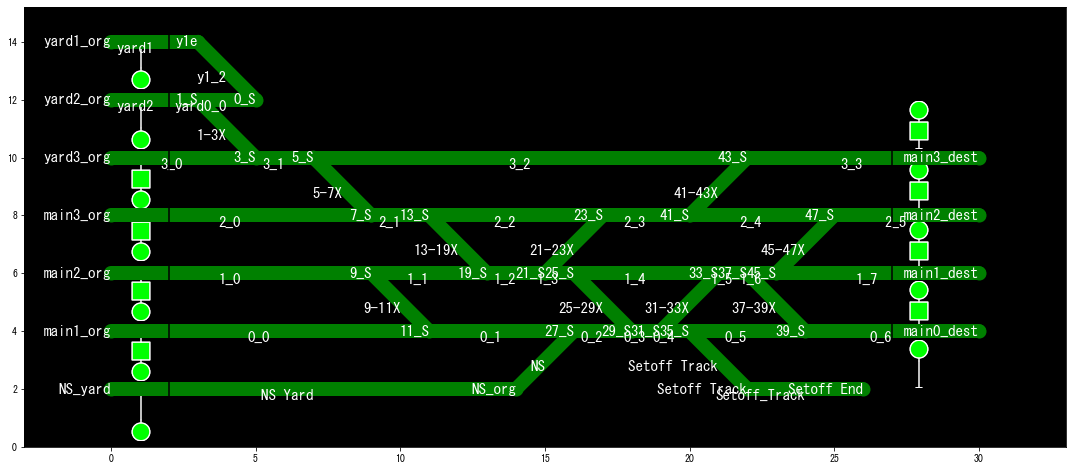

In [14]:
W.show_network(figsize=(15,15));

# Customizing the Interface

In [15]:
from matplotlib.figure import Figure
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import transforms

def show_network(world, width=1, left_handed=1, figsize=(6, 6), network_font_size=10, node_size=6):
    """
    Visualizes the entire transportation network shape.
    """
    signal_symbols = []
    
    # Determine if the Routes are open or closed on either side of the interlocking
    signal_attributes_eb = {
        # Origin Values (color, position)
        'NS_Yard': (world.LINKS[14].color, (1, 1), 'yard'),
        'main_0_org': (world.LINKS[18].color, (1, 3), world.LINKS[24].color),
        'main_1_org': (world.LINKS[25].color, (1, 5),  world.LINKS[32].color),
        'main_2_org': (world.LINKS[33].color, (1, 7), world.LINKS[38].color),
        'main_3_org': (world.LINKS[39].color, (1, 8.75), world.LINKS[42].color),
        'yard_2_org': (world.LINKS[12].color, (1, 10.75), 'yard'),
        'yard_1_org': (world.LINKS[10].color, (1, 12.75), 'yard')
    }

    signal_attributes_wb = {
        # Destinations
        'setoff_track': (world.LINKS[16].color, (27, 2.75), 'yard'),
        'main0_dest': (world.LINKS[24].color, (27, 4.75), world.LINKS[18].color),
        'main1_dest': (world.LINKS[32].color, (27, 6.75), world.LINKS[25].color),
        'main2_dest': (world.LINKS[38].color, (27, 8.75), world.LINKS[33].color),
        'main3_dest': (world.LINKS[42].color, (27, 10.75), world.LINKS[39].color)
    }
    
    for signal in signal_attributes_eb:
        # Mainline Green/Green Case
        if signal_attributes_eb[signal][2] != 'yard' and signal_attributes_eb[signal][0] == 'green' and signal_attributes_eb[signal][2] == 'green':
            signal_icon = np.flipud(plt.imread(f'./railroad icons/{signal_attributes_eb[signal][0]}_circle_{signal_attributes_eb[signal][2]}_square.png'))

        # Mainline Green/Red Case
        elif signal_attributes_eb[signal][2] != 'yard' and signal_attributes_eb[signal][0] == 'green' and signal_attributes_eb[signal][2] == 'red':
            signal_icon = np.flipud(plt.imread(f'./railroad icons/red_circle_yellow_square.png'))

        # Mainline Red/Green Case
        elif signal_attributes_eb[signal][2] != 'yard' and signal_attributes_eb[signal][0] == 'red' and signal_attributes_eb[signal][2] == 'red':
            signal_icon = np.flipud(plt.imread(f'./railroad icons/red_circle_red_square.png'))

        # Mainline Red/Red Case
        elif signal_attributes_eb[signal][2] != 'yard' and signal_attributes_eb[signal][0] == 'red' and signal_attributes_eb[signal][2] == 'red':
            signal_icon = np.flipud(plt.imread(f'./railroad icons/{signal_attributes_eb[signal][0]}_circle_{signal_attributes_eb[signal][2]}_square.png'))

        # Yard Case - Green
        elif signal_attributes_eb[signal][2] == 'yard' and signal_attributes_eb[signal][0] == 'green':
            signal_icon = np.flipud(plt.imread(f'./railroad icons/{signal_attributes_eb[signal][0]}_circle.png'))

        # Yard Case - Red
        elif signal_attributes_eb[signal][2] == 'yard' and signal_attributes_eb[signal][0] == 'red':
            signal_icon = np.flipud(plt.imread(f'./railroad icons/{signal_attributes_eb[signal][0]}_circle.png'))

        # Unexpected Case
        else:
            print(signal)

        im = OffsetImage(signal_icon, zoom=.5)
        ab = AnnotationBbox(im, signal_attributes_eb[signal][1], boxcoords="offset points", bboxprops=dict(visible=False))
        signal_symbols.append(ab)
    
    for signal in signal_attributes_wb:
        # Mainline Green/Green Case
        if signal_attributes_wb[signal][2] != 'yard' and signal_attributes_wb[signal][0] == 'green' and signal_attributes_wb[signal][2] == 'green':
            signal_icon = plt.imread(f'./railroad icons/{signal_attributes_wb[signal][0]}_circle_{signal_attributes_wb[signal][2]}_square.png')

        # Mainline Green/Red Case
        elif signal_attributes_wb[signal][2] != 'yard' and signal_attributes_wb[signal][0] == 'green' and signal_attributes_wb[signal][2] == 'red':
            signal_icon = plt.imread(f'./railroad icons/red_circle_yellow_square.png')

        # Mainline Red/Green Case
        elif signal_attributes_wb[signal][2] != 'yard' and signal_attributes_wb[signal][0] == 'red' and signal_attributes_wb[signal][2] == 'gree':
            signal_icon = plt.imread(f'./railroad icons/red_circle_red_square.png')

        # Mainline Red/Red Case
        elif signal_attributes_wb[signal][2] != 'yard' and signal_attributes_wb[signal][0] == 'red' and signal_attributes_wb[signal][2] == 'red':
            signal_icon = plt.imread(f'./railroad icons/{signal_attributes_wb[signal][0]}_circle_{signal_attributes_wb[signal][2]}_square.png')

        # Yard Case - Green
        elif signal_attributes_wb[signal][2] == 'yard' and signal_attributes_wb[signal][0] == 'green':
            signal_icon = plt.imread(f'./railroad icons/{signal_attributes_wb[signal][0]}_circle.png')

        # Yard Case - Red
        elif signal_attributes_wb[signal][2] == 'yard' and signal_attributes_wb[signal][0] == 'red':
            signal_icon = plt.imread(f'./railroad icons/{signal_attributes_wb[signal][0]}_circle.png')

        # Unexpected Case
        else:
            print(signal, signal_attributes_wb[signal][0], )

        im = OffsetImage(signal_icon, zoom=.5)
        ab = AnnotationBbox(im, signal_attributes_wb[signal][1], boxcoords="offset points", bboxprops=dict(visible=False))
        signal_symbols.append(ab)
    
    
    f = plt.figure(figsize=figsize)
    plt.subplot(111, aspect="equal")
    for n in world.NODES:
        plt.plot(n.x, n.y, "o", color=n.color, ms=13, zorder=10, solid_capstyle="round") # ms
        if network_font_size > 0:
            plt.text(n.x, n.y, n.name, c="white", horizontalalignment="right", verticalalignment="center", zorder=20,
                     fontsize=15) # c, fontsize
    for l in world.LINKS:
        x1, y1 = l.start_node.x, l.start_node.y
        x2, y2 = l.end_node.x, l.end_node.y
        # simpleMode
        xmid1, ymid1 = (x1 + x2) / 2, (y1 + y2) / 2
        plt.plot([x1, x2], [y1, y2], color=l.color, lw=14, zorder=7, solid_capstyle="round") # ms
        if network_font_size > 0:
            plt.text(xmid1, ymid1, l.name, c="white", horizontalalignment="right", verticalalignment="top", zorder=20, fontsize=15)
    maxx = max([n.x for n in world.NODES])
    minx = min([n.x for n in world.NODES])
    maxy = max([n.y for n in world.NODES])
    miny = min([n.y for n in world.NODES])
    buffx, buffy = (maxx - minx) / 10, (maxy - miny) / 10
    if buffx == 0:
        buffx = buffy
    if buffy == 0:
        buffy = buffx
    
    # Assign the current plot axes to ax to start adding in signals
    ax = plt.gca()
    ax.set_facecolor('black')
    for signal in signal_symbols:
        ax.add_artist(signal)
    
    # Vertical lines for the start and end of interlocking
    plt.vlines(x = 2, ymin=1.5, ymax=14.5, color = 'black', label = 'AF-Start', zorder=20)
    plt.vlines(x = 27, ymin=1.5, ymax=10.5, color = 'black', label = 'AF-End', zorder=20)    
    
    # Establish the limits of the plot
    plt.xlim([minx - buffx, maxx + buffx])
    plt.ylim([0, maxy + buffy]) # miny - buffy
    plt.tight_layout()

    return f

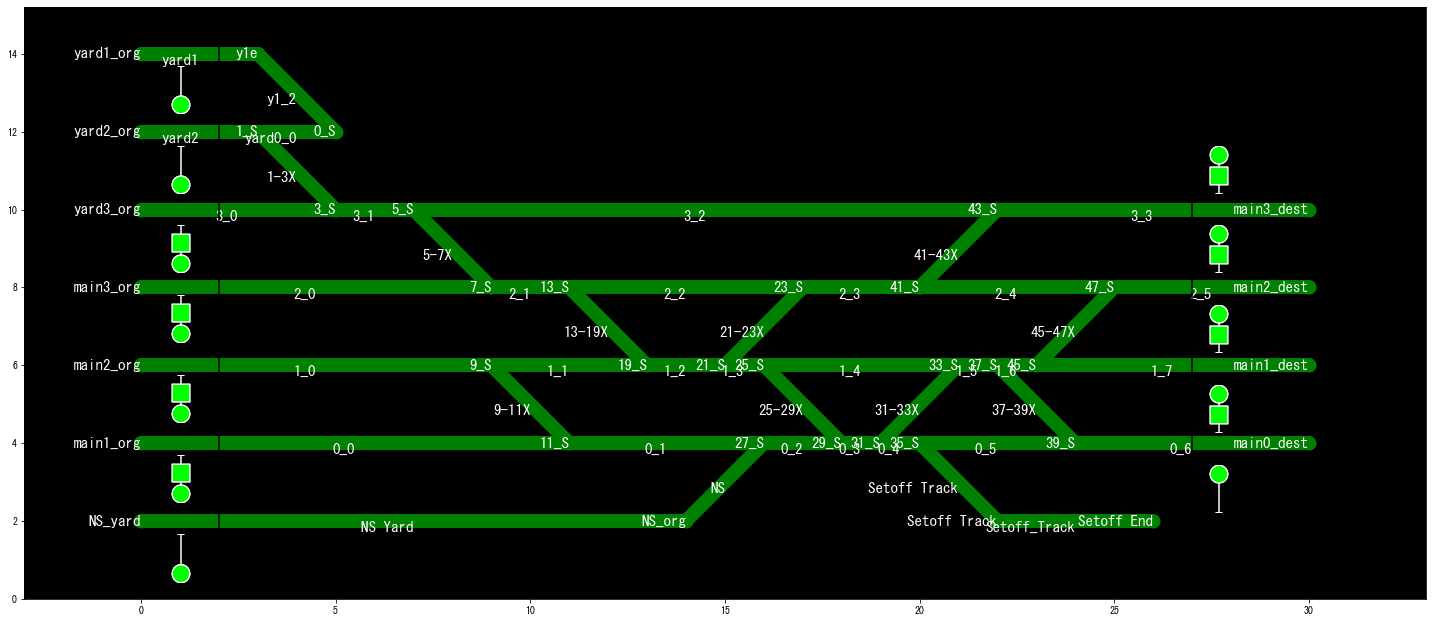

In [16]:
show_network(W, figsize = (20, 20));

In [17]:
# Color reset
for link in W.LINKS:
    link.color = 'green'
for node in W.NODES:
    node.color = 'green'

In [18]:
# Example of closing main 1
W.LINKS[32].color = 'red'

W.NODES[35].color = 'red'
W.NODES[32].color = 'red'

In [19]:
# Example of closing main 0/1/2
W.LINKS[1].color = 'red' # 5-7X 
W.LINKS[2].color = 'red' # 9-11X 
W.LINKS[3].color = 'red' # 13-19X 
# W.LINKS[4].color = 'red'  # 15-17X
W.LINKS[5].color = 'red' # 25-29X 
W.LINKS[6].color = 'red' # 31-33X
W.LINKS[7].color = 'red' # 37-39X
W.LINKS[9].color = 'red' # 45-47X 
W.LINKS[13].color = 'red' # NS
W.LINKS[14].color = 'red' # NS Yard
W.LINKS[18].color = 'red' # 0_0
W.LINKS[19].color = 'red' # 0_1
W.LINKS[20].color = 'red' # 0_2
W.LINKS[21].color = 'red' # 0_3
W.LINKS[22].color = 'red' # 0_4
W.LINKS[23].color = 'red' # 0_5
W.LINKS[24].color = 'red' # 0_6
W.LINKS[29].color = 'red' # 1_4
W.LINKS[30].color = 'red' # 1_5
W.LINKS[31].color = 'red' # 1_6
W.LINKS[32].color = 'red' # 1_7
W.LINKS[38].color = 'red' # 2_5

W.NODES[6].color = 'red' # main1_org
W.NODES[7].color = 'red' # NS_org
W.NODES[8].color = 'red' # NS_Yard
W.NODES[14].color = 'red' # 5_S
W.NODES[15].color = 'red' # 7_S
W.NODES[16].color = 'red' # 9_S
W.NODES[17].color = 'red' # 11_S
W.NODES[18].color = 'red' # 13_S
W.NODES[19].color = 'red' # 19_S
W.NODES[23].color = 'red' # 27_S
W.NODES[25].color = 'red' # 31_S
W.NODES[26].color = 'red' # 28_S
W.NODES[27].color = 'red' # 35_S
W.NODES[22].color = 'red' # 25_S
W.NODES[24].color = 'red' # 29_S
W.NODES[28].color = 'red' # 37_S
W.NODES[29].color = 'red' # 39_S
W.NODES[32].color = 'red' # 45_S
W.NODES[33].color = 'red' # 47_S
W.NODES[34].color = 'red' # main0_dest
W.NODES[35].color = 'red' # Main1_dest
W.NODES[36].color = 'red' # main2_dest

In [20]:
for index, link in enumerate(W.NODES):
    print(index, link)

0 <Node yard1_org>
1 <Node y1e>
2 <Node yard2_org>
3 <Node yard3_org>
4 <Node main3_org>
5 <Node main2_org>
6 <Node main1_org>
7 <Node NS_org>
8 <Node NS_yard>
9 <Node Setoff Track>
10 <Node Setoff End>
11 <Node 0_S>
12 <Node 1_S>
13 <Node 3_S>
14 <Node 5_S>
15 <Node 7_S>
16 <Node 9_S>
17 <Node 11_S>
18 <Node 13_S>
19 <Node 19_S>
20 <Node 21_S>
21 <Node 23_S>
22 <Node 25_S>
23 <Node 27_S>
24 <Node 29_S>
25 <Node 31_S>
26 <Node 33_S>
27 <Node 35_S>
28 <Node 37_S>
29 <Node 39_S>
30 <Node 41_S>
31 <Node 43_S>
32 <Node 45_S>
33 <Node 47_S>
34 <Node main0_dest>
35 <Node main1_dest>
36 <Node main2_dest>
37 <Node main3_dest>


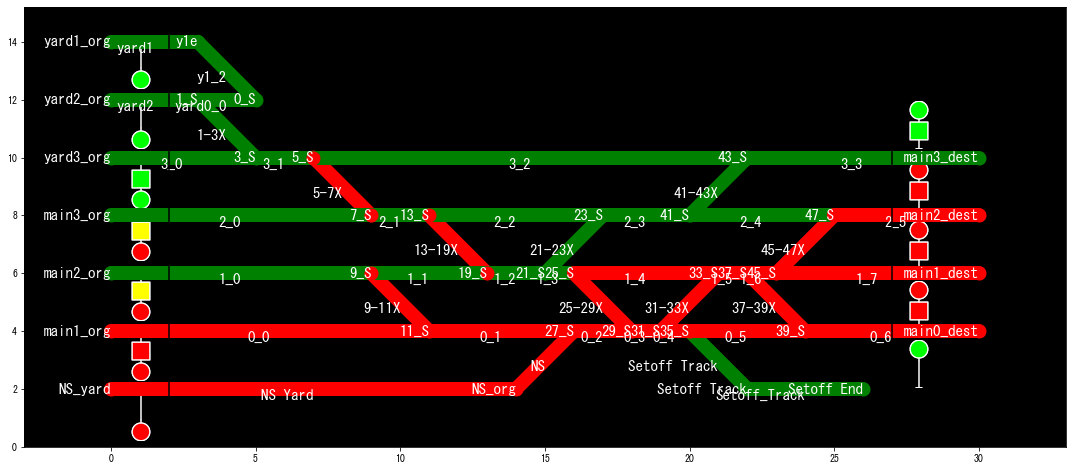

In [21]:
W.show_network(figsize=(15,15));

In [22]:
for i, node in enumerate(W.NODES):
    print(i, node)

0 <Node yard1_org>
1 <Node y1e>
2 <Node yard2_org>
3 <Node yard3_org>
4 <Node main3_org>
5 <Node main2_org>
6 <Node main1_org>
7 <Node NS_org>
8 <Node NS_yard>
9 <Node Setoff Track>
10 <Node Setoff End>
11 <Node 0_S>
12 <Node 1_S>
13 <Node 3_S>
14 <Node 5_S>
15 <Node 7_S>
16 <Node 9_S>
17 <Node 11_S>
18 <Node 13_S>
19 <Node 19_S>
20 <Node 21_S>
21 <Node 23_S>
22 <Node 25_S>
23 <Node 27_S>
24 <Node 29_S>
25 <Node 31_S>
26 <Node 33_S>
27 <Node 35_S>
28 <Node 37_S>
29 <Node 39_S>
30 <Node 41_S>
31 <Node 43_S>
32 <Node 45_S>
33 <Node 47_S>
34 <Node main0_dest>
35 <Node main1_dest>
36 <Node main2_dest>
37 <Node main3_dest>


In [23]:
for i, link in enumerate(W.LINKS):
    print(i, link)

0 <Link 1-3X>
1 <Link 5-7X>
2 <Link 9-11X>
3 <Link 13-19X>
4 <Link 21-23X>
5 <Link 25-29X>
6 <Link 31-33X>
7 <Link 37-39X>
8 <Link 41-43X>
9 <Link 45-47X>
10 <Link yard1>
11 <Link y1_2>
12 <Link yard2>
13 <Link NS>
14 <Link NS Yard>
15 <Link yard0_0>
16 <Link Setoff_Track>
17 <Link Setoff Track>
18 <Link 0_0>
19 <Link 0_1>
20 <Link 0_2>
21 <Link 0_3>
22 <Link 0_4>
23 <Link 0_5>
24 <Link 0_6>
25 <Link 1_0>
26 <Link 1_1>
27 <Link 1_2>
28 <Link 1_3>
29 <Link 1_4>
30 <Link 1_5>
31 <Link 1_6>
32 <Link 1_7>
33 <Link 2_0>
34 <Link 2_1>
35 <Link 2_2>
36 <Link 2_3>
37 <Link 2_4>
38 <Link 2_5>
39 <Link 3_0>
40 <Link 3_1>
41 <Link 3_2>
42 <Link 3_3>


In [24]:
W.adddemand("main2_org", "main1_dest", 0, 1000)
#W.adddemand("main3_org", "main2_dest", 0, 1000, 0.6)
#W.adddemand("main1_dest", "main2_org", 0, 1000, 0.4)
#W.adddemand("main0_dest", "main1_org", 0, 1000, 0.6)

#W.adddemand("main1_dest", "main3_org", 0, 1000, flow=.4)
#W.adddemand("main2_dest", "main2_org", 0, 1000, flow=.6)

In [25]:
W.exec_simulation()

simulation setting:
 scenario name: AF-RO
 simulation duration:	 1000 s
 number of vehicles:	 0 veh
 total road length:	 2150 m
 time discret. width:	 1 s
 platoon size:		 1 veh
 number of timesteps:	 1000
 number of platoons:	 0
 number of links:	 43
 number of nodes:	 38
 setup time:		 1.24 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|        0 vehs|   0.0 m/s|     0.08 s
     999 s|        0 vehs|   0.0 m/s|     0.12 s
 simulation finished


1

In [26]:
W.analyzer.print_simple_stats()

results:
 average speed:	 0.0 m/s
 number of completed trips:	 0 / 0


# Adding Remaining Segments of Track

## Slater's Lane (CFP 106.3)

## Analysis Results

Stored as Raw to save space in file, convert them back to code cells to run.

In [27]:
#overall
df = W.analyzer.basic_to_pandas()
display(df)

#OD-specific traffic situation
df = W.analyzer.od_to_pandas()
display(df)

#MFD
df = W.analyzer.mfd_to_pandas()
display(df)

#link-level
df = W.analyzer.link_to_pandas()
display(df)

#within link
df = W.analyzer.link_traffic_state_to_pandas()
display(df)

#vehicle-level
df = W.analyzer.vehicles_to_pandas()
display(df)

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,0,0,-1,-1,-1,-1


,orig,dest,total_trips,completed_trips,free_travel_time,average_travel_time,stddiv_travel_time


,t,network_k,network_q
0,0,0.0,0.0


,link,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time
0,1-3X,0,0,1.666667,-1,-1
1,5-7X,0,0,1.666667,-1,-1
2,9-11X,0,0,1.666667,-1,-1
3,13-19X,0,0,1.666667,-1,-1
4,21-23X,0,0,1.666667,-1,-1
5,25-29X,0,0,1.666667,-1,-1
6,31-33X,0,0,1.666667,-1,-1
7,37-39X,0,0,1.666667,-1,-1
8,41-43X,0,0,1.666667,-1,-1
9,45-47X,0,0,1.666667,-1,-1


,link,t,x,delta_t,delta_x,q,k,v
0,1-3X,0,0,120,30,0.0,0.0,30.0
1,1-3X,120,0,120,30,0.0,0.0,30.0
2,1-3X,240,0,120,30,0.0,0.0,30.0
3,1-3X,360,0,120,30,0.0,0.0,30.0
4,1-3X,480,0,120,30,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...
339,3_3,360,0,120,50,0.0,0.0,50.0
340,3_3,480,0,120,50,0.0,0.0,50.0
341,3_3,600,0,120,50,0.0,0.0,50.0
342,3_3,720,0,120,50,0.0,0.0,50.0


,name,dn,orig,dest,t,link,x,s,v


 generating animation...


  0%|          | 0/34 [00:00<?, ?it/s]

 generating animation...


  0%|          | 0/500 [00:00<?, ?it/s]

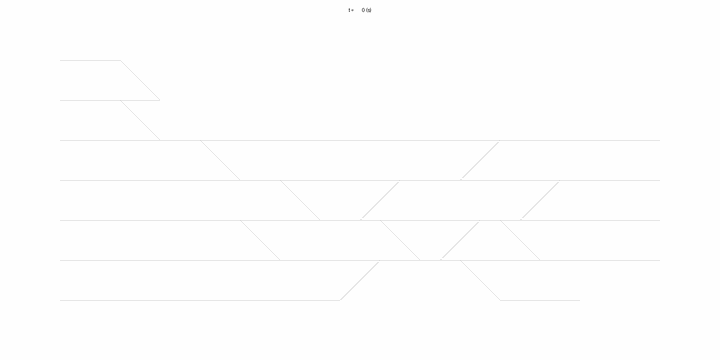

In [28]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, figsize=(6,6))
from IPython.display import display, Image
#with open("outAF-RO/anim_network0.gif", "rb") as f:
#    display(Image(data=f.read(), format='png'))
#    
#W.analyzer.network_anim(detailed=1, figsize=(6,6), network_font_size=0)
#
#with open("outAF-RO/anim_network1.gif", "rb") as f:
#    display(Image(data=f.read(), format='png'))

W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5)

with open("outAF-RO/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

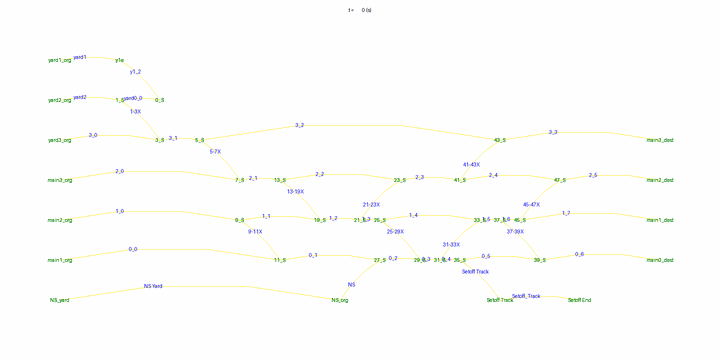

FileNotFoundError: [Errno 2] No such file or directory: 'outAF-RO/anim_network1.gif'

In [29]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, figsize=(6,6), network_font_size=0)
from IPython.display import display, Image

with open("outAF-RO/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
    
W.analyzer.network_anim(detailed=1, figsize=(6,6), network_font_size=0)

with open("outAF-RO/anim_network1.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5, network_font_size=0)

with open("outAF-RO/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [ ]:
W.ROUTECHOICE.pred[1]

# Rail Network Simulator

## Modules

### rail_simulator.py

Main file of the simulator. Made up of 6 Classes.

#### Class: Node

Node object within the network. Note that docstrings were pulled out of class definion into markdown to simplify python code aspects

**<u>Parameters</u>**:

        W : object
            The world to which the node belongs.
        name : str
            The name of the node.
        x : float
            The x-coordinate of the node (for visualization purposes).
        y : float
            The y-coordinate of the node (for visualization purposes).
        signal : list of int, optional
            A list representing the signal at the node. Default is [0], representing no signal.
            If a signal is present, the list contains the green times for each group.
            For example, `signal`=[60, 10, 50, 5] means that this signal has 4 phases, and green time for the 1st group is 60self.
        signal_offset : float, optional
            The offset of the signal. Default is 0.
        flow_capacity : float, optional
            The maximum flow capacity of the node. Default is None, meaning infinite capacity.
        auto_rename : bool, optional
            Whether to automatically rename the node if the name is already used. Default is False.
        number_of_lanes : int, optional
            The number of lanes that can be green simultaniously at the node. Default is None.

**<u>Attributes</u>**:

        signal_phase : int
            The phase of current signal. Links that have the same `signal_group` have a green signal.
        signal_t : float
            The elapsed time since the current signal phase started. When it is larger than `Link.signal[Link.signal_phase]`, the phase changes to the next one.

In [ ]:
class Node:
    def __init__(self, W, name, x, y, signal=[0], signal_offset=0, block_control=0, flow_capacity=None, auto_rename=False):
        
        self.W = W

        self.x = x
        self.y = y

        self.inbound_traffic = {}
        self.outbound_traffic = {}

        self.inbound_vehicles = []

        # Inbound Vehicle Queue
        self.generation_queue = deque()

        # Part of a Signalized Interlocking
        self.signal = signal
        self.signal_phase = 0
        self.signal_t = 0
        self.signal_offset = signal_offset
        offset = self.signal_offset
        if self.signal != [0]:
            i = 0
            while 1:
                if offset < self.signal[i]:
                    self.signal_phase = i
                    self.signal_t = offset
                    break
                offset -= self.signal[i]

                i += 1
                if i >= len(self.signal):
                    i = 0

        self.signal_log = []
        
        # flowRestrictionMacroSignal
        self.flag_lanes_automatically_determined = False
        if flow_capacity != None:
            self.flow_capacity = flow_capacity
            self.flow_capacity_remain = flow_capacity * self.W.DELTAT
            if number_of_lanes != None:
                self.lanes = number_of_lanes
            else:
                self.lanes = math.ceil(flow_capacity / 0.8)  # TODO: Adjustment required. Currently, the number of lanes is determined based on the assumption that one lane is 0.8 veh/s.
                self.flag_lanes_automatically_determined = True
        else:
            self.flow_capacity = None
            self.flow_capacity_remain = 10e10
            self.lanes = None

        self.id = len(self.W.NODES)
        self.name = name
        if self.name in [n.name for n in self.W.NODES]:
            if auto_rename:
                self.name = self.name + "_renamed" + "".join(random.choices(string.ascii_letters + string.digits, k=8))
            else:
                raise ValueError(f"Node name {self.name} already used by another node. Please specify a unique name.")
        self.W.NODES.append(self)

    def __repr__(self):
        return f"<Node {self.name}>"

    def generate(self):
        """
        Departs vehicles from the waiting queue.

        Notes
        -----
        If there are vehicles in the generation queue of the node, this method attempts to depart a vehicle to one of the outgoing links.
        The choice of the outgoing link is based on the vehicle's route preference for each link. Once a vehicle is departed, it is removed from the generation queue, added to the list of vehicles on the chosen link, and its state is set to "run".
        """
        outbound_traffic0 = list(self.outbound_traffic.values())
        if len(outbound_traffic0):
            for i in range(sum([l.lanes for l in outbound_traffic0])):
                if len(self.generation_queue) > 0:
                    veh = self.generation_queue[0]

                    # consider the link preferences
                    outbound_traffic = list(self.outbound_traffic.values())
                    if set(outbound_traffic) & set(veh.links_prefer):
                        outbound_traffic = list(set(outbound_traffic) & set(veh.links_prefer))
                    if set(outbound_traffic) & set(veh.links_avoid):
                        outbound_traffic = list(set(outbound_traffic) - set(veh.links_avoid))

                    preference = [veh.route_pref[l] for l in outbound_traffic]
                    if sum(preference) > 0:
                        outlink = random.choices(outbound_traffic, preference)[0]
                    else:
                        outlink = random.choices(outbound_traffic)[0]

                    if (len(outlink.vehicles) < outlink.lanes or outlink.vehicles[
                        -outlink.lanes].x > outlink.delta_per_lane * self.W.DELTAN) and outlink.capacity_in_remain >=self.W.DELTAN:
                        # ifAcceptableSelectAccordingToLinkPriority
                        veh = self.generation_queue.popleft()

                        veh.state = "run"
                        veh.link = outlink
                        veh.x = 0
                        veh.v = outlink.u  # improvedEdgeBehavior
                        self.W.VEHICLES_RUNNING[veh.name] = veh

                        if len(outlink.vehicles) > 0:
                            veh.lane = (outlink.vehicles[-1].lane + 1) % outlink.lanes
                        else:
                            veh.lane = 0

                        veh.leader = None
                        if len(outlink.vehicles) >= outlink.lanes:
                            veh.leader = outlink.vehicles[-outlink.lanes]
                            veh.leader.follower = veh
                            assert veh.leader.lane == veh.lane

                        outlink.vehicles.append(veh)

                        outlink.cum_arrival[-1] += self.W.DELTAN
                        veh.link_arrival_time = self.W.T * self.W.DELTAT

                        outlink.capacity_in_remain -= self.W.DELTAN
                    else:
                        # If it is not acceptable, no inflow will occur from this node.
                        break
                else:
                    break

    def transfer(self):
        """
        Transfers vehicles between links at the node.

        Notes
        -----
        This method handles the transfer of vehicles from one link to another at the node.
        A vehicle is eligible for transfer if:
        - The next link it intends to move to has space.
        - The vehicle has the right signal phase to proceed.
        - The current link has enough capacity to allow the vehicle to exit.
        - The node capacity is not exceeded.
        """
        outbound_traffic = []
        for outlink in {veh.route_next_link for veh in self.inbound_vehicles if veh.route_next_link != None}:
            for i in range(outlink.lanes):  # There are as many acceptance trials as there are lanes.
                outbound_traffic.append(outlink)
        random.shuffle(outbound_traffic)

        for outlink in outbound_traffic:
            if (len(outlink.vehicles) < outlink.lanes or outlink.vehicles[
                -outlink.lanes].x > outlink.delta_per_lane * self.W.DELTAN) and outlink.capacity_in_remain >= self.W.DELTAN and self.flow_capacity_remain >= self.W.DELTAN:
                # If acceptable and leakable, select according to link priority
                vehs = [
                    veh for veh in self.inbound_vehicles
                    if veh == veh.link.vehicles[0] and  # vehicleInTheLeadLaneOnTheSendingLink
                       veh.route_next_link == outlink and  # destinationLinkIsAnAcceptedLink
                       (self.signal_phase in veh.link.signal_group or len(self.signal) <= 1) and  # signalMatches
                       veh.link.capacity_out_remain >= self.W.DELTAN
                ]
                if len(vehs) == 0:
                    continue
                veh = random.choices(vehs, [veh.link.merge_priority for veh in vehs])[
                    0]  # Links with few lanes benefit from the number of trials of links with many lanes, giving them a slight advantage. There is no big difference, so I accept it.

                inlink = veh.link

                # 累積台数関連更新
                inlink.cum_departure[-1] += self.W.DELTAN
                outlink.cum_arrival[-1] += self.W.DELTAN
                inlink.traveltime_actual[
                int(veh.link_arrival_time / self.W.DELTAT):] = self.W.T * self.W.DELTAT - veh.link_arrival_time  # The actual travel time after your inflow time is also tentatively determined using the current actual travel time. The assumption is that a later leaked vehicle will overwrite the information.

                veh.link_arrival_time = self.W.T * self.W.DELTAT

                inlink.capacity_out_remain -= self.W.DELTAN
                outlink.capacity_in_remain -= self.W.DELTAN
                if self.flow_capacity != None:
                    self.flow_capacity_remain -= self.W.DELTAN

                # linkTransitionExecution
                inlink.vehicles.popleft()
                veh.link = outlink
                veh.x = 0

                if veh.follower != None:
                    veh.follower.leader = None
                    veh.follower = None

                if len(outlink.vehicles) > 0:
                    veh.lane = (outlink.vehicles[-1].lane + 1) % outlink.lanes
                else:
                    veh.lane = 0

                veh.leader = None
                if len(outlink.vehicles) >= outlink.lanes:
                    veh.leader = outlink.vehicles[-outlink.lanes]
                    veh.leader.follower = veh
                    assert veh.leader.lane == veh.lane

                # remainingRunProcessing
                x_next = veh.move_remain * outlink.u / inlink.u
                if veh.leader != None:
                    x_cong = veh.leader.x_old - veh.link.delta_per_lane * veh.W.DELTAN
                    if x_cong < veh.x:
                        x_cong = veh.x
                    if x_next > x_cong:
                        x_next = x_cong
                    if x_next >= outlink.length:
                        x_next = outlink.length
                veh.x = x_next

                # If the vehicle following the vehicle that just moved is waiting for the trip to end, the trip will end.
                if len(inlink.vehicles) and inlink.vehicles[0].flag_waiting_for_trip_end:
                    inlink.vehicles[0].end_trip()

                outlink.vehicles.append(veh)
                self.inbound_vehicles.remove(veh)

        # Finish the trip of the vehicle waiting for the trip to end at the beginning of each link.
        for link in self.inbound_traffic.values():
            for lane in range(link.lanes):
                if len(link.vehicles) and link.vehicles[0].flag_waiting_for_trip_end:
                    link.vehicles[0].end_trip()
                else:
                    break

        self.inbound_vehicles = []

#### Class: Link

In [ ]:
class Link:
    """
    Link in a network.
    """

    def __init__(self, W, name, start_node, end_node, length, free_flow_speed=20, jam_density=0.2,
                 jam_density_per_lane=None, number_of_lanes=1, merge_priority=1, signal_group=0, capacity_out=None,
                 capacity_in=None, eular_dx=None, attribute=None, auto_rename=False):
        """
        Create a link

        Parameters
        ----------
        W : object
            The world to which the link belongs.
        name : str
            The name of the link.
        start_node : str | Node
            The name of the start node of the link.
        end_node : str | Node
            The name of the end node of the link.
        length : float
            The length of the link.
        free_flow_speed : float, optional
            The free flow speed on the link, default is 20.
        jam_density : float, optional
            The jam density on the link, default is 0.2. If jam_density_per_lane is specified, this value is ignored.
        jam_density_per_lane : float, optional
            The jam density per lane on the link. If specified, it overrides the jam_density value.
        number_of_lanes : int, optional
            The number of lanes on the link, default is 1.
        merge_priority : float, optional
            The priority of the link when merging at the downstream node, default is 1.
        signal_group : int or list, optional
            The signal group(s) to which the link belongs, default is 0. If `signal_group` is int, say 0, it becomes green if `end_node.signal_phase` is 0. If `signal_group` is list, say [0,1], it becomes green if the `end_node.signal_phase` is 0 or 1.
        capacity_out : float, optional
            The capacity out of the link, default is calculated based on other parameters.
        capacity_in : float, optional
            The capacity into the link, default is calculated based on other parameters.
        eular_dx : float, optional
            The space aggregation size for link traffic state computation, default is 1/10 of link length or free flow distance per simulation step, whichever is larger.
        attribute : any, optional
            Additional (meta) attributes defined by users.
        auto_rename : bool, optional
            Whether to automatically rename the link if the name is already used. Default is False (raise an exception).

        Attributes
        ----------
        speed : float
            Average speed of traffic on the link.
        density : float
            Density of traffic on the link.
        flow : float
            Flow of traffic on the link.
        num_vehicles : float
            Number of vehicles on the link.
        num_vehicles_queue : float
            Number of slow vehicles (due to congestion) on the link.
        free_flow_speed : float
            Free flow speed of the link.
        jam_density : float
            Jam density of the link.
        capacity_out : float
            Capacity for outflow from the link.
        capacity_in : float
            Capacity for inflow to the link.
        merge_priority : float
            The priority of the link when merging at the downstream node.

        Notes
        -----
        Traffic Flow Model:

        - The link model follows a multi-lane, single-pipe approach where FIFO is guaranteed per link and no lane changing occurs.
        - Fundamental diagram parameters such as free_flow_speed, jam_density (or jam_density_per_lane), and number_of_lanes determine the link's flow characteristics. Reaction time of drivers `REACTION_TIME` is a grobal parameter.
        - Real-time link status for external reference is maintained with attributes `speed`, `density`, `flow`, `num_vehicles`, and `num_vehicles_queue`.

        Traffic Flow Model Parameters:

        - Their definition is illustrated as https://toruseo.jp/UXsim/docs/_images/fundamental_diagram.png
        - If you are not familiar to the traffic flow theory, it is recommended that you adjust only `free_flow_speed` and `number_of_lanes` for the traffic flow model parameters, leaving the other parameters at their default values.

        Capacity and Bottlenecks:

        - The `capacity_out` and `capacity_in` parameters set the outflow and inflow capacities of the link. If not provided, the capacities are unlimited.
        - These capacities can represent bottlenecks at the beginning or end of the link.

        Connection to Node Model:

        - At the downstream end of a sending link, vehicles in all lanes have the right to be sent out, but FIFO order is maintained.
        - At the upstream end of a receiving link, all lanes can accept vehicles.

        Parameter Adjustments:

        - Some traffic flow model parameters like `free_flow_speed`, `jam_density`, `capacity_out`, `capacity_in`, and `merge_priority` can be altered during simulation to reflect changing conditions.

        Details on Multi-lane model:

        - Link model:
            - Multiple lanes with single-pipe model. FIFO is guaranteed per link. No lane changing.
            - Links have a `lanes` attribute representing the number of lanes.
            - Each vehicle has a `lane` attribute.
            - Each vehicle follows the leader vehicle in the same lane, i.e., the vehicle `lanes` steps ahead on the link.
        - Node model:
            - Sending links:
                - Vehicles in all lanes at the downstream end of the link have the right to be sent out.
                - However, to ensure link FIFO, vehicles are tried to be sent out in the order they entered the link. If a vehicle cannot be accepted, the outflow from that link stops.
            - Receiving links:
                - All lanes at the upstream end of the link can accept vehicles.

        Details on Fundamental diagram parameters (+: input, ++: alternative input):

        - free_flow_speed (m/s)+
        - jam_density (veh/m/LINK)+
        - jam_density_per_lane (veh/m/lane)++
        - lanes, number_of_lane (lane)+
        - tau: y-intercept of link FD (s/veh*LINK)
        - REACTION_TIME, World.reaction_time (s/veh*lane)
        - w (m/s)
        - capacity (veh/s/LINK)
        - capacity_per_lane (veh/s/lane)
        - delta: minimum spacing (m/veh*LINK)
        - delta_per_lane: minimum spacing in lane (m/veh*lane)
        - q_star: capacity (veh/s/LINK)
        - k_star: critical density (veh/s/LINK)
        - capacity_in, capacity_out: bottleneck capacity at beginning/end of link (veh/s/LINK)+
        - Node.flow_capacity: node flow capacity (veh/s/LINK-LIKE)+
        """

        self.W = W
        # originDestinationNode
        self.start_node = self.W.get_node(start_node)
        self.end_node = self.W.get_node(end_node)

        # linkLength
        self.length = length

        # NumberOfLanes
        self.lanes = int(number_of_lanes)
        if self.lanes != number_of_lanes:
            raise ValueError(f"number_of_lanes must be an integer. Got {number_of_lanes} at {s}.")

        # flowModelParameters:per link
        self.u = free_flow_speed
        self.kappa = jam_density
        if jam_density == 0.2 and jam_density_per_lane != None:
            self.kappa = jam_density_per_lane * number_of_lanes
        if jam_density != 0.2 and jam_density_per_lane != None:
            self.kappa = jam_density_per_lane * number_of_lanes
            warnings.warn(f"{s}: jam_density is ignored because jam_density_per_lane is set.", UserWarning)
        self.tau = self.W.REACTION_TIME / self.lanes
        self.w = 1 / self.tau / self.kappa
        self.capacity = self.u * self.w * self.kappa / (self.u + self.w)
        self.delta = 1 / self.kappa
        self.delta_per_lane = self.delta * self.lanes  # m/veh for each lane. used for car-following model per lane
        self.q_star = self.capacity  # flow capacity
        self.k_star = self.capacity / self.u  # critical density

        # PriorityWhenMerging
        self.merge_priority = merge_priority

        # listOfVehiclesInTheLink
        self.vehicles = deque()

        # TravelTime
        self.traveltime_instant = []

        # RouteSelectionCorrection
        self.route_choice_penalty = 0

        # CumulativeFigureRelationship
        self.cum_arrival = []
        self.cum_departure = []
        self.traveltime_actual = []

        # signalRelated
        self.signal_group = signal_group
        if type(self.signal_group) == int:
            self.signal_group = [self.signal_group]

        # outflowCapacity
        self.capacity_out = capacity_out
        if capacity_out == None:
            self.capacity_out = self.capacity * 2
            # todo_later: capacity_out It seems that there is a slight bug (multi-discrete discretization error). At least when it is not set, it is doubled so that the bug does not become apparent.
        self.capacity_out_remain = self.capacity_out * self.W.DELTAT

        # inflowCapacity
        self.capacity_in = capacity_in
        if capacity_in == None:
            self.capacity_in = 10e10
            self.capacity_in_remain = 10e10
        else:
            self.capacity_in_remain = self.capacity_in * self.W.DELTAT

        self.id = len(self.W.LINKS)
        self.name = name
        if self.name in [l.name for l in self.W.LINKS]:
            if auto_rename:
                self.name = self.name + "_renamed" + "".join(random.choices(string.ascii_letters + string.digits, k=8))
            else:
                raise ValueError(f"Link name {self.name} already used by another link. Please specify a unique name.")
        self.W.LINKS.append(self)
        self.start_node.outbound_traffic[self.name] = self
        self.end_node.inbound_traffic[self.name] = self

        self.attribute = attribute

        # realTimeLinkStatusForExternalReference
        self._speed = -1  # averageSpeedAcrossLinks
        self._density = -1
        self._flow = -1
        self._num_vehicles = -1  # NumberOfVehicles
        self._num_vehicles_queue = -1  # NumberOfVehiclesBelowFreeStreamSpeed

        # MoreAccurateVehicleTrajectory
        self.tss = []
        self.xss = []
        self.cs = []
        self.ls = []
        self.names = []

        if eular_dx == None:
            self.eular_dx = self.length / 10
            if self.eular_dx < self.u * self.W.DELTAT:
                self.eular_dx = self.u * self.W.DELTAT

    def __repr__(self):
        return f"<Link {self.name}>"

    def init_after_tmax_fix(self):
        """
        Initalization before simulation execution.
        """

        # EulertypeTrafficCondition
        self.edie_dt = self.W.EULAR_DT
        self.edie_dx = self.eular_dx
        self.k_mat = np.zeros([int(self.W.TMAX / self.edie_dt) + 1, int(self.length / self.edie_dx)])
        self.q_mat = np.zeros(self.k_mat.shape)
        self.v_mat = np.zeros(self.k_mat.shape)
        self.tn_mat = np.zeros(self.k_mat.shape)
        self.dn_mat = np.zeros(self.k_mat.shape)
        self.an = self.edie_dt * self.edie_dx

        # accumulation
        self.traveltime_actual = np.array([self.length / self.u for t in range(self.W.TSIZE)])

    def update(self):
        """
        Make necessary updates when the timestep is incremented.
        """
        self.in_out_flow_constraint()

        self.set_traveltime_instant()
        self.cum_arrival.append(0)
        self.cum_departure.append(0)
        if len(self.cum_arrival) > 1:
            self.cum_arrival[-1] = self.cum_arrival[-2]
            self.cum_departure[-1] = self.cum_departure[-2]

        # RealTimeStateReset
        self._speed = -1
        self._density = -1
        self._flow = -1
        self._num_vehicles = -1
        self._num_vehicles_queue = -1

    def in_out_flow_constraint(self):
        """
        Link capacity updates.
        """
        # Processing to keep the link inflow/outflow rate below the outflow capacity. Ensure maximum number of passes per time step
        if self.capacity_in != None:
            if self.capacity_out_remain < self.W.DELTAN * self.lanes:
                self.capacity_out_remain += self.capacity_out * self.W.DELTAT
            if self.capacity_in_remain < self.W.DELTAN * self.lanes:
                self.capacity_in_remain += self.capacity_in * self.W.DELTAT
        else:
            self.capacity_out_remain = 10e10
            self.capacity_in_remain = 10e10

    def set_traveltime_instant(self):
        """
        Compute instantanious travel time.
        """
        if self.speed > 0:
            self.traveltime_instant.append(self.length / self.speed)
        else:
            self.traveltime_instant.append(self.length / (self.u / 100))

    def arrival_count(self, t):
        """
        Get cumulative vehicle count of arrival to this link on time t

        Parameters
        ----------
        t : float
            Time in seconds.

        Returns
        -------
        float
            The cumulative arrival vehicle count.
        """
        tt = int(t // self.W.DELTAT)
        if tt >= len(self.cum_arrival):
            return self.cum_arrival[-1]
        if tt < 0:
            return self.cum_arrival[0]
        return self.cum_arrival[tt]

    def departure_count(self, t):
        """
        Get cumulative vehicle count of departure from this link on time t

        Parameters
        ----------
        t : float
            Time in seconds.

        Returns
        -------
        float
            The cumulative departure vehicle count.
        """
        tt = int(t // self.W.DELTAT)
        if tt >= len(self.cum_departure):
            return self.cum_departure[-1]
        if tt < 0:
            return self.cum_departure[0]
        return self.cum_departure[tt]

    def instant_travel_time(self, t):
        """
        Get instantanious travel time of this link on time t

        Parameters
        ----------
        t : float
            Time in seconds.

        Returns
        -------
        float
            The instantanious travel time.
        """
        tt = int(t // self.W.DELTAT)
        if tt >= len(self.traveltime_instant):
            return self.traveltime_instant[-1]
        if tt < 0:
            return self.traveltime_instant[0]
        return self.traveltime_instant[tt]

    def actual_travel_time(self, t):
        """
        Get actual travel time of vehicle who enters this link on time t. Note that small error may occur due to fractional processing.

        Parameters
        ----------
        t : float
            Time in seconds.

        Returns
        -------
        float
            The actual travel time.
        """
        tt = int(t // self.W.DELTAT)
        if tt >= len(self.traveltime_actual):
            return self.traveltime_actual[-1]
        if tt < 0:
            return self.traveltime_actual[0]
        return self.traveltime_actual[tt]

    # getter/setter
    @property
    def speed(self):
        if self._speed == -1:
            if len(self.vehicles):
                self._speed = np.average([veh.v for veh in self.vehicles])
            else:
                self._speed = self.u
        return self._speed

    @property
    def density(self):
        if self._density == -1:
            self._density = self.num_vehicles / self.length
        return self._density

    @property
    def flow(self):
        if self._flow == -1:
            self._flow = self.density * self.speed
        return self._flow

    @property
    def num_vehicles(self):
        if self._num_vehicles == -1:
            self._num_vehicles = len(self.vehicles) * self.W.DELTAN
        return self._num_vehicles

    @property
    def num_vehicles_queue(self):
        if self._num_vehicles_queue == -1:
            self._num_vehicles_queue = sum([veh.v < self.u for veh in self.vehicles]) * self.W.DELTAN
        return self._num_vehicles_queue

    @property
    def free_flow_speed(self):
        return self.u

    @free_flow_speed.setter
    def free_flow_speed(self, new_value):
        if new_value >= 0:
            self.u = new_value
            self.w = 1 / self.tau / self.kappa
            self.capacity = self.u * self.w * self.kappa / (self.u + self.w)
            self.delta = 1 / self.kappa
        else:
            warnings.warn(f"ignored negative free_flow_speed at {self}", UserWarning)

    @property
    def jam_density(self):
        return self.kappa

    @jam_density.setter
    def jam_density(self, new_value):
        if new_value >= 0:
            self.kappa = new_value
            self.w = 1 / self.tau / self.kappa
            self.capacity = self.u * self.w * self.kappa / (self.u + self.w)
            self.delta = 1 / self.kappa
        else:
            warnings.warn(f"ignored negative jam_density at {self}", UserWarning)


#### Class: Vehicle

In [ ]:
class Vehicle:
    """
    Vehicle or platoon in a network.
    """

    def __init__(self, W, orig, dest, departure_time, name=None, route_pref=None, route_choice_principle=None,
                 mode="single_trip", links_prefer=[], links_avoid=[], trip_abort=1, departure_time_is_time_step=0,
                 attribute=None, auto_rename=False):
        """
        Create a vehicle (more precisely, platoon)

        Parameters
        ----------
        W : object
            The world to which the vehicle belongs.
        orig : str | Node
            The origin node.
        dest : str | Node
            The destination node.
        departure_time : int
            The departure time step of the vehicle.
        name : str, optional
            The name of the vehicle, default is the id of the vehicle.
        route_pref : dict, optional
            The preference weights for links, default is 0 for all links.
        route_choice_principle : str, optional
            The route choice principle of the vehicle, default is the network's route choice principle.
        mode : str, optional
            The mode of the vehicle. Available options are "single_trip" and "taxi", default is "single_trip".
            "single_trip": The vehicle makes a single trip from the origin to the destination.
            "taxi": The vehicle serves multiple trips by specifying sequence of destinations. The destination list `Vehicle.dest_list` can be dynamically updated externaly. (TODO: to be implemented next)
        links_prefer : list of str, optional
            The names of the links the vehicle prefers, default is empty list.
        links_avoid : list of str, optional
            The names of the links the vehicle avoids, default is empty list.
        trip_abort : int, optional
            Whether to abort the trip if a dead end is reached, default is 1.
        attribute : any, optinonal
            Additional (meta) attributes defined by users.
        auto_rename : bool, optional
            Whether to automatically rename the vehicle if the name is already used. Default is False.
        """

        self.W = W
        # DepartureDestinationNode
        self.orig = self.W.get_node(orig)
        self.dest = self.W.get_node(dest)

        # DepartureArrivalTime
        if departure_time_is_time_step:  # For compatibility, departure_time is always expressed in timestep notation. -> TODO: needToBeRevised
            self.departure_time = departure_time
        else:
            self.departure_time = int(departure_time / self.W.DELTAT)
        self.arrival_time = -1
        self.link_arrival_time = -1
        self.travel_time = -1

        # state：home, wait, run，end
        self.state = "home"

        # positionInLink
        self.link = None
        self.x = 0
        self.x_next = 0
        self.x_old = 0
        self.v = 0

        # DrivingLane
        self.lane = 0

        # GoFirstAndDriveLast
        self.leader = None
        self.follower = None

        # tripEndPreparationFlag
        self.flag_waiting_for_trip_end = 0

        # treatmentOfRemainingRunAtTheEndOfTheLink
        self.move_remain = 0

        # routeSelection
        if route_choice_principle == None:
            self.route_choice_principle = self.W.route_choice_principle
        else:
            self.route_choice_principle = route_choice_principle

        # private vehicle or taxi
        self.mode = mode
        self.dest_list = []

        # dict of events that are triggered when this vehicle reaches a certain node {Node: func}
        self.node_event = {}

        # DesiredLinkWeightLinkWeight
        self.route_pref = route_pref
        if self.route_pref == None:
            self.route_pref = {l: 0 for l in self.W.LINKS}

        # LinksToLikeAndAvoidMyopic
        self.links_prefer = [s.W.get_link(l) for l in links_prefer]
        self.links_avoid = [s.W.get_link(l) for l in links_avoid]

        # StopTheTripWhenItReachesADeadEnd
        self.trip_abort = trip_abort
        self.flag_trip_aborted = 0

        # LogEtc
        self.log_t = []  # always
        self.log_state = []  # state
        self.log_link = []  # link
        self.log_x = []  # position
        self.log_s = []  # headingDistance
        self.log_v = []  # currentSpeed
        self.log_lane = []  # lane
        self.color = (random.random(), random.random(), random.random())

        self.log_t_link = [[int(self.departure_time * self.W.DELTAT), "home"]]  # When entering a new link, only the time and link are saved. For route analysis

        self.attribute = attribute

        self.id = len(self.W.VEHICLES)
        if name != None:
            self.name = name
        else:
            self.name = str(self.id)
        if self.name in [veh.name for veh in self.W.VEHICLES.values()]:
            if auto_rename:
                self.name = self.name + "_renamed" + "".join(random.choices(string.ascii_letters + string.digits, k=8))
            else:
                raise ValueError(
                    f"Vehicle name {self.name} already used by another vehicle. Please specify a unique name.")
        self.W.VEHICLES[self.name] = self
        self.W.VEHICLES_LIVING[self.name] = self

    def __repr__(self):
        return f"<Vehicle {self.name}: {self.state}, x={self.x}, link={self.link}>"

    def update(self):
        """
        Updates the vehicle's state and position.

        Notes
        -----
        This method updates the state and position of the vehicle based on its current situation.

        - If the vehicle is at "home", it checks if the current time matches its departure time. If so, the vehicle's state is set to "wait" and it is added to the generation queue of its origin node.
        - If the vehicle is in the "wait" state, it remains waiting at its departure node.
        - If the vehicle is in the "run" state, it updates its speed and position. If the vehicle reaches the end of its current link, it either ends its trip if it has reached its destination, or requests a transfer to the next link.
        - If the vehicle's state is "end" or "abort", no further actions are taken.
        """
        self.record_log()

        if self.state == "home":
            # depart
            if self.W.T >= self.departure_time:
                self.state = "wait"
                self.orig.generation_queue.append(self)
        if self.state == "wait":
            # wait at the vertical queue at the origin node
            pass
        if self.state == "run":
            # drive within the link
            self.v = (self.x_next - self.x) / self.W.DELTAT
            self.x_old = self.x
            self.x = self.x_next

            # at the end of the link
            if self.x == self.link.length:
                if self.link.end_node in self.node_event.keys():
                    self.node_event[s.link.end_node]()

                if self.link.end_node == self.dest:
                    if self.mode == "single_trip":
                        # prepare for trip end
                        self.flag_waiting_for_trip_end = 1
                        if self.link.vehicles[0] == self:
                            self.end_trip()
                    elif self.mode == "taxi":
                        # proceed to next destination
                        if len(s.dest_list) > 0:
                            self.dest = self.dest_list.pop(0)
                        else:
                            self.dest = None
                            self.dest_list = []
                        self.route_pref_update(weight=1)
                        self.route_next_link_choice()
                        self.link.end_node.inbound_vehicles.append(s)

                elif len(self.link.end_node.outbound_traffic.values()) == 0 and self.trip_abort == 1:
                    # prepare for trip abort due to dead end
                    self.flag_trip_aborted = 1
                    self.route_next_link = None
                    self.flag_waiting_for_trip_end = 1
                    if self.link.vehicles[0] == self:
                        self.end_trip()

                else:
                    # request link transfer
                    self.route_next_link_choice()
                    self.link.end_node.inbound_vehicles.append(self)

        if self.state in ["end", "abort"]:
            # ended the trip
            pass

    def end_trip(self):
        """
        Procedure when the vehicle finishes its trip.
        """
        self.state = "end"

        self.link.cum_departure[-1] += self.W.DELTAN
        self.link.traveltime_actual[int(self.link_arrival_time / self.W.DELTAT):] = (self.W.T + 1) * self.W.DELTAT - self.link_arrival_time  # improvedEdgeBehavior todo: carefulExamination

        if self.follower != None:
            self.follower.leader = None

        self.link.vehicles.popleft()
        self.link = None
        self.x = 0
        self.arrival_time = self.W.T  # TODO: arrival_time IsAlsoExpressedAsATimeStepNeedsCorrection
        self.travel_time = (self.arrival_time - self.departure_time) * self.W.DELTAT
        self.W.VEHICLES_RUNNING.pop(self.name)
        self.W.VEHICLES_LIVING.pop(self.name)

        if self.flag_trip_aborted:
            self.state = "abort"
            self.arrival_time = -1
            self.travel_time = -1

        self.record_log(enforce_log=1)

    def carfollow(self):
        """
        Drive withing a link.
        """
        self.x_next = self.x + self.link.u * self.W.DELTAT
        if self.leader != None:
            x_cong = self.leader.x - self.link.delta_per_lane * self.W.DELTAN
            if x_cong < self.x:
                x_cong = self.x
            if self.x_next > x_cong:
                self.x_next = x_cong

        if self.x_next > self.link.length:
            self.move_remain = self.x_next - self.link.length
            self.x_next = self.link.length

    def route_pref_update(self, weight):
        """
        Updates the vehicle's link preferences for route choice.

        Parameters
        ----------
        weight : float
            The weight for updating the link preferences based on the recent travel time.
            Should be in the range [0, 1], where 0 means the old preferences are fully retained and 1 means the preferences are completely updated.

        Notes
        -----
        This method updates the link preferences used by the vehicle to select its route based on its current understanding of the system.

        - If the vehicle's route choice principle is "homogeneous_DUO", it will update its preferences based on a global, homogenous dynamic user optimization (DUO) model.
        - If the route choice principle is "heterogeneous_DUO", it will update its preferences based on a heterogeneous DUO model, considering both its past preferences and the system's current state. This is imcomplete feature. Not recommended.

        The updated preferences guide the vehicle's decisions in subsequent route choices.
        """
        if self.route_choice_principle == "homogeneous_DUO":
            if self.dest != None:
                self.route_pref = self.W.ROUTECHOICE.route_pref[self.dest.id]
            else:
                self.route_pref = {l: 0 for l in self.W.LINKS}
        elif self.route_choice_principle == "heterogeneous_DUO":
            route_pref_new = {l: 0 for l in self.W.LINKS}
            k = self.dest.id
            for l in self.W.LINKS:
                i = l.start_node.id
                j = l.end_node.id
                if j == self.W.ROUTECHOICE.next[i, k]:
                    route_pref_new[l] = 1

            if sum(list(s.route_pref.values())) == 0:
                # If preference is initially empty, initialize it deterministically
                weight = 1
            for l in self.route_pref.keys():
                self.route_pref[l] = (1 - weight) * self.route_pref[l] + weight * route_pref_new[l]

    def route_next_link_choice(self):
        """
        Select a next link from the current link.
        """
        if self.dest != self.link.end_node:
            outbound_traffic = list(self.link.end_node.outbound_traffic.values())

            if len(outbound_traffic):

                # if links_prefer is given and available at the node, select only from the links in the list. if links_avoid is given, select links not in the list.
                if set(outbound_traffic) & set(self.links_prefer):
                    outbound_traffic = list(set(outbound_traffic) & set(self.links_prefer))
                if set(outbound_traffic) & set(self.links_avoid):
                    outbound_traffic = list(set(outbound_traffic) - set(self.links_avoid))

                preference = [self.route_pref[l] for l in outbound_traffic]

                if sum(preference) > 0:
                    self.route_next_link = random.choices(outbound_traffic, preference)[0]
                else:
                    self.route_next_link = random.choices(outbound_traffic)[0]
            else:
                self.route_next_link = None

    def add_dest(self, dest, order=-1):
        """
        Add a destination to the vehicle's destination list.

        Parameters
        ----------
        dest : str | Node
            The destination node to be added.
        order : int, optional
            The order of the destination in the list. Default is -1, which appends the destination to the end of the list.
        """
        if self.mode == "taxi":
            if self.dest == None:
                self.dest = dest
                self.route_pref_update(weight=1)
            else:
                if order == -1:
                    self.dest_list.append(s.W.get_node(dest))
                else:
                    self.dest_list.insert(order, self.W.get_node(dest))
        else:
            raise ValueError(f"Vehicle {s.name} is not in taxi mode. Cannot add destination.")

    def set_links_prefer(self, links):
        """
        Set the links the vehicle prefers.

        Parameters
        ----------
        links : list of str
            The list of link names the vehicle prefers.
        """
        self.links_prefer = [s.W.get_link(l) for l in links]

    def set_links_avoid(self, links):
        """
        Set the links the vehicle avoids.

        Parameters
        ----------
        links : list of str
            The list of link names the vehicle avoids.
        """
        self.links_avoid = [s.W.get_link(l) for l in links]

    def add_dests(self, dests):
        """
        Add multiple destinations to the vehicle's destination list.

        Parameters
        ----------
        dests : list of str | Node
            The list of destinations to be added.
        """
        for dest in dests:
            self.add_dest(dest)

    def traveled_route(self):
        """
        Returns the route this vehicle traveled.
        """
        link_old = -1
        t = -1
        route = []
        ts = []
        for i, link in enumerate(s.log_link):
            if link_old != link:
                route.append(link)
                ts.append(s.log_t[i])
                link_old = link

        return Route(s.W, route[:-1]), ts

    def get_xy_coords(self, t=-1):
        """
        Get the x-y coordinates of the vehicle. If t is given, the position at time t is returned based on the logs.

        Parameters
        ----------
        t : int | float, optional
            Time in seconds. If it is -1, the latest position is returned.
        """
        if t != -1:
            link = self.log_link[int(t / self.W.DELTAT / self.W.logging_timestep_interval)]
            xx = self.log_x[int(t / self.W.DELTAT / self.W.logging_timestep_interval)]
        else:
            link = self.link
            xx = self.x
        x0 = link.start_node.x
        y0 = link.start_node.y
        x1 = link.end_node.x
        y1 = link.end_node.y
        x = x0 + (x1 - x0) * xx / link.length
        y = y0 + (y1 - y0) * xx / link.length
        return (x, y)

    def record_log(self, enforce_log=0):
        """
        Record travel logs.

        Parameters
        ----------
        enforce_log : bool, optional
            Record log regardless of the logging interval, default is 0.
        """
        if self.W.vehicle_logging_timestep_interval != -1:
            if (self.W.T % self.W.vehicle_logging_timestep_interval == 0 or enforce_log):
                if self.state != "run":
                    if self.state == "end" and self.log_t_link[-1][1] != "end":
                        self.log_t_link.append([self.W.T * self.W.DELTAT, "end"])

                    self.log_t.append(self.W.T * self.W.DELTAT)
                    self.log_state.append(self.state)
                    self.log_link.append(-1)
                    self.log_x.append(-1)
                    self.log_s.append(-1)
                    self.log_v.append(-1)
                    self.log_lane.append(-1)

                    if self.state == "wait":
                        self.W.analyzer.average_speed_count += 1
                        self.W.analyzer.average_speed += 0
                else:
                    if len(self.log_link) == 0 or self.log_link[-1] != self.link:
                        self.log_t_link.append([self.W.T * self.W.DELTAT, self.link])

                    self.log_t.append(self.W.T * self.W.DELTAT)
                    self.log_state.append(self.state)
                    self.log_link.append(self.link)
                    self.log_x.append(self.x)
                    self.log_v.append(self.v)
                    self.log_lane.append(self.lane)
                    if self.leader != None and self.link == self.leader.link:
                        self.log_s.append(self.leader.x - self.x)
                    else:
                        self.log_s.append(-1)

                    self.W.analyzer.average_speed_count += 1
                    self.W.analyzer.average_speed += (self.v - self.W.analyzer.average_speed) / self.W.analyzer.average_speed_count


#### Class: RouteChoice

In [ ]:
import numpy as np

In [ ]:
class RouteChoice:
    """
    Class for computing shortest path for all vehicles.
    """

    def __init__(self, W):
        """
        Create route choice computation object.

        Parameters
        ----------
        W : object
            The world to which this belongs.
        """
        self.W = W
        # LinkTravelTimeMatrix
        self.adj_mat_time = np.zeros([len(self.W.NODES), len(self.W.NODES)])
        # TheShortestDistanceBetweenIj
        self.dist = np.zeros([len(self.W.NODES), len(self.W.NODES)])
        # theNextNodeToGoToToGoFromIToJ
        self.next = np.zeros([len(self.W.NODES), len(self.W.NODES)])
        # theNodeThatCameToGoFromIToJ
        self.pred = np.zeros([len(self.W.NODES), len(self.W.NODES)])

        # homogeneous DUO用．_1IfItIsOnTheShortestPathToGoToK
        self.route_pref = {k.id: {l: 0 for l in self.W.LINKS} for k in self.W.NODES}

    def route_search_all(self, infty=np.inf, noise=0):
        """
        Compute the current shortest path based on instantanious travel time.

        Parameters
        ----------
        infty : float
            value representing infinity.
        noise : float
            very small noise to slightly randomize route choice. useful to eliminate strange results at an initial stage of simulation where many routes has identical travel time.
        """
        self.adj_mat_time = np.zeros([len(self.W.NODES), len(self.W.NODES)])
        adj_mat_link_count = np.zeros([len(self.W.NODES), len(self.W.NODES)])

        for link in self.W.LINKS:
            i = link.start_node.id
            j = link.end_node.id
            if self.W.ADJ_MAT[i, j]:
                new_link_tt = link.traveltime_instant[-1] * random.uniform(1, 1 + noise) + link.route_choice_penalty
                n = adj_mat_link_count[i, j]
                self.adj_mat_time[i, j] = self.adj_mat_time[i, j] * n / (n + 1) + new_link_tt / (
                            n + 1)  # if there are multiple links between the same nodes, average the travel time
                # self.adj_mat_time[i,j] = new_link_tt #if there is only one link between the nodes, this line is fine, but for generality we use the above line
                adj_mat_link_count[i, j] += 1
                if link.capacity_in == 0:  # if the inflow is profibited, travel time is assumed to be infinite
                    self.adj_mat_time[i, j] = np.inf
            else:
                self.adj_mat_time[i, j] = np.inf

        self.dist, self.pred = floyd_warshall(self.adj_mat_time, return_predecessors=True)

        n_vertices = self.pred.shape[0]
        self.next = -np.ones((n_vertices, n_vertices), dtype=int)
        for i in range(n_vertices):
            for j in range(n_vertices):
                # followTheShortestPathFromIToJInReverse．．． -> todo: You can search for the shortest route by reversing the starting and ending points.
                if i != j:
                    prev = j
                    while self.pred[i, prev] != i and self.pred[i, prev] != -9999:
                        prev = self.pred[i, prev]
                    self.next[i, j] = prev

    def homogeneous_DUO_update(self):
        """
        Update link preference of all homogeneous travelers based on DUO principle.
        """
        for dest in self.W.NODES:
            k = dest.id
            weight = self.W.DUO_UPDATE_WEIGHT
            if sum(list(self.route_pref[k].values())) == 0:
                # AtFirst preference ifIsEmptyInitializeDeterministically
                weight = 1
            for l in self.W.LINKS:
                i = l.start_node.id
                j = l.end_node.id
                if j == self.W.ROUTECHOICE.next[i, k]:
                    self.route_pref[k][l] = (1 - weight) * self.route_pref[k][l] + weight
                else:
                    self.route_pref[k][l] = (1 - weight) * self.route_pref[k][l]


#### Class: World

In [ ]:
class World:
    """
    World (i.e., simulation environment). A World object is consistently referred to as `W` in this code.
    """

    def __init__(self, name="", deltan=5, reaction_time=1, duo_update_time=600, duo_update_weight=0.5, duo_noise=0.01,
                 eular_dt=120, eular_dx=100, random_seed=None, print_mode=1, save_mode=1, show_mode=0,
                 route_choice_principle="homogeneous_DUO", show_progress=1, show_progress_deltat=600, tmax=None,
                 vehicle_logging_timestep_interval=1):
        """
        Create a World.

        Parameters
        ----------
        name : str, optional
            The name of the world, default is an empty string.
        deltan : int, optional
            The platoon size, default is 5 vehicles.
        reaction_time : float, optional
            The reaction time, default is 1 second. This is also related to simulation time step width.
        duo_update_time : float, optional
            The time interval for route choice update, default is 600 seconds.
        duo_update_weight : float, optional
            The update weight for route choice, default is 0.5.
        duo_noise : float, optional
            The noise in route choice, default is 0.01.
        eular_dt : float, optional
            The time aggregation size for eularian traffic state computation, default is 120.
        random_seed : int or None, optional
            The random seed, default is None.
        print_mode : int, optional
            The print mode, whether print the simulation progress or not. Default is 1 (enabled).
        save_mode : int, optional
            The save mode,. whether save the simulation results or not.  Default is 1 (enabled).
        show_mode : int, optional
            The show mode, whether show the matplotlib visualization results or not. Default is 0 (disabled).
        route_choice_principle : str, optional
            The route choice principle, default is "homogeneous_DUO".
        show_progress : int, optional
            Whether show network progress, default is 1 (enabled).
        show_progress_deltat : float, optional
            The time interval for showing network progress, default is 600 seconds.
        tmax : float or None, optional
            The simulation duration, default is None (automatically determined).
        vehicle_logging_timestep_interval : int, optional
            The interval for logging vehicle data, default is 1. Logging is off if set to -1.
            Setting large intervel (2 or more) or turn off the logging makes the simulation significantly faster in large-scale scenarios without loosing simulation internal accuracy, but outputed vehicle trajecotry and other related data will become inaccurate.

        Notes
        -----
        A World object must be defined firstly to initiate simulation.
        """

        # parameterSettings
        random.seed(random_seed)
        np.random.seed(random_seed)
        self.random_seed = random_seed

        self.TMAX = tmax  # SimulationTime（s）

        self.DELTAN = deltan  # vehicleFleetSize（veh）
        self.REACTION_TIME = reaction_time  # ReactionTime（s）

        self.DUO_UPDATE_TIME = duo_update_time  # RouteSelectionTimeInterval（s）
        self.DUO_UPDATE_WEIGHT = duo_update_weight  # RouteSelectionUpdateWeight
        self.DUO_NOISE = duo_noise  # NoiseDuringRouteSelection（Preventing extreme routing choices in a fully symmetric network）
        self.EULAR_DT = eular_dt  # Eular DefaultTimeDiscretizationWidthForTypeData

        self.DELTAT = self.REACTION_TIME * self.DELTAN
        self.DELTAT_ROUTE = int(self.DUO_UPDATE_TIME / self.DELTAT)

        # dataStorageDestinationDefinition
        self.VEHICLES = OrderedDict()  # home, wait, run, end
        self.VEHICLES_LIVING = OrderedDict()  # home, wait, run
        self.VEHICLES_RUNNING = OrderedDict()  # run
        self.NODES = []
        self.LINKS = []

        self.vehicle_logging_timestep_interval = vehicle_logging_timestep_interval

        self.route_choice_principle = route_choice_principle

        # realTimeProgressDisplay
        self.show_progress = show_progress
        self.show_progress_deltat_timestep = int(show_progress_deltat / W.DELTAT)

        # systemSetting
        self.name = name

        self.finalized = 0
        self.world_start_time = time.time()

        self.print_mode = print_mode
        if print_mode:
            self.print = print
        else:
            def noprint(*args, **kwargs):
                pass

            self.print = noprint
        self.save_mode = save_mode
        self.show_mode = show_mode

    def addNode(self, *args, **kwargs):
        """
        add a node to world

        Parameters
        ----------
        name : str
            The name of the node.
        x : float
            The x-coordinate of the node (for visualization purposes).
        y : float
            The y-coordinate of the node (for visualization purposes).
        signal : list of int, optional
            A list representing the signal at the node. Default is [0], representing no signal.
            If a signal is present, the list contains the green times for each group.
            For example, `signal`=[60, 10, 50, 5] means that this signal has 4 phases, and green time for the 1st group is 60s.
        signal_offset : float, optional
            The offset of the signal. Default is 0.
        flow_capacity : float, optional
            The maximum flow capacity of the node. Default is None, meaning infinite capacity.
        auto_rename : bool, optional
            Whether to automatically rename the node if the name is already used. Default is False.

        Returns
        -------
        object
            the added Node object.

        Notes
        -----
        This function acts as a wrapper for creating a Node object and adding it to the network.
        It passes all given arguments and keyword arguments to the Node class initialization.
        """
        return Node(self, *args, **kwargs)

    def addLink(self, *args, **kwargs):
        """
        add a link to world

        Parameters
        ----------
        name : str
            The name of the link.
        start_node : str | Node
            The name or object of the start node of the link.
        end_node : str | Node
            The name or object of the end node of the link.
        length : float
            The length of the link.
        free_flow_speed : float
            The free flow speed on the link.
        jam_density : float
            The jam density on the link.
        merge_priority : float, optional
            The priority of the link when merging at the downstream node, default is 1.
        signal_group : int or list, optional
            The signal group to which the link belongs, default is 0. If `signal_group` is int, say 0, it becomes green if `end_node.signal_phase` is 0.  the If `signal_group` is list, say [0,1], it becomes green if the `end_node.signal_phase` is 0 or 1.
        capacity_out : float, optional
            The capacity out of the link, default is calculated based on other parameters.
        capacity_in : float, optional
            The capacity into the link, default is calculated based on other parameters.
        eular_dx : float, optional
            The default space aggregation size for link traffic state computation, default is None. If None, the global eular_dx value is used.
        attribute : any, optinonal
            Additional (meta) attributes defined by users.
        auto_rename : bool, optional
            Whether to automatically rename the link if the name is already used. Default is False.

        Returns
        -------
        object
            the added Link object.

        Notes
        -----
        This function acts as a wrapper for creating a Link object and adding it to the network.
        It passes all given arguments and keyword arguments to the Link class initialization.
        """
        return Link(self, *args, **kwargs)

    def addVehicle(self, *args, **kwargs):
        """
        add a vehicle to world

        Parameters
        ----------
        orig : str | Node
            The origin node.
        dest : str | Node
            The destination node.
        departure_time : int
            The departure time of the vehicle.
        name : str, optional
            The name of the vehicle, default is the id of the vehicle.
        route_pref : dict, optional
            The preference weights for links, default is 0 for all links.
        route_choice_principle : str, optional
            The route choice principle of the vehicle, default is the network's route choice principle.
        links_prefer : list of str, optional
            The names of the links the vehicle prefers, default is empty list.
        links_avoid : list of str, optional
            The names of the links the vehicle avoids, default is empty list.
        trip_abort : int, optional
            Whether to abort the trip if a dead end is reached, default is 1.
        attribute : any, optinonal
            Additional (meta) attributes defined by users.
        auto_rename : bool, optional
            Whether to automatically rename the vehicle if the name is already used. Default is False.

        Returns
        -------
        object
            the added Vehicle object.

        Notes
        -----
        This function acts as a wrapper for creating a Vehicle object and adding it to the network.
        It passes all given arguments and keyword arguments to the Vehicle class initialization.
        """
        return Vehicle(self, *args, **kwargs)

    def adddemand(self, orig, dest, t_start, t_end, flow=-1, volume=-1, attribute=None):
        """
        Generate vehicles by specifying time-dependent origin-destination demand.

        Parameters
        ----------
        orig : str | Node
            The name or object of the origin node.
        dest : str | Node
            The name or object of the destination node.
        t_start : float
            The start time for the demand in seconds.
        t_end : float
            The end time for the demand in seconds.
        flow : float, optional
            The flow rate from the origin to the destination in vehicles per second.
        volume: float, optional
            The demand volume from the origin to the destination. If volume is specified, the flow is ignored.
        attribute : any, optinonal
            Additional (meta) attributes defined by users.
        """
        if volume > 0:
            flow = volume / (t_end - t_start)

        f = 0
        for t in range(int(t_start / self.DELTAT), int(t_end / self.DELTAT)):
            f += flow * self.DELTAT
            while f >= self.DELTAN:
                self.addVehicle(orig, dest, t, departure_time_is_time_step=1, attribute=attribute)
                f -= self.DELTAN

    def adddemand_point2point(self, x_orig, y_orig, x_dest, y_dest, t_start, t_end, flow=-1, volume=-1, attribute=None):
        """
        Generate vehicles by specifying time-dependent origin-destination demand using coordinates.

        Parameters
        ----------
        x_orig : float
            The x-coordinate of the origin.
        y_orig : float
            The y-coordinate of the origin.
        x_dest : float
            The x-coordinate of the destination.
        y_dest : float
            The y-coordinate of the destination.
        t_start : float
            The start time for the demand in seconds.
        t_end : float
            The end time for the demand in seconds.
        flow : float, optional
            The flow rate from the origin to the destination in vehicles per second.
        volume: float, optional
            The demand volume from the origin to the destination. If volume is specified, the flow is ignored.
        attribute : any, optinonal
            Additional (meta) attributes defined by users.
        """
        orig = self.get_nearest_node(x_orig, y_orig)
        dest = self.get_nearest_node(x_dest, y_dest)
        self.adddemand(orig, dest, t_start, t_end, flow, volume, attribute)

    def adddemand_area2area(self, x_orig, y_orig, radious_orig, x_dest, y_dest, radious_dest, t_start, t_end, flow=-1,
                            volume=-1, attribute=None):
        """
        Generate vehicles by specifying time-dependent origin-destination demand by specifying circular areas.

        Parameters
        ----------
        x_orig : float
            The x-coordinate of the center of the origin area.
        y_orig : float
            The y-coordinate of the center of the origin area.
        radious_orig : float
            The radious of the origin area. Note that too large radious may generate too sparse demand that is rounded to zero.
        x_dest : float
            The x-coordinate of the center of the destination area.
        y_dest : float
            The y-coordinate of the center of the destination area.
        radious_dest : float
            The radious of the destination area.
        t_start : float
            The start time for the demand in seconds.
        t_end : float
            The end time for the demand in seconds.
        flow : float, optional
            The flow rate from the origin to the destination in vehicles per second.
        volume: float, optional
            The demand volume from the origin to the destination. If volume is specified, the flow is ignored.
        attribute : any, optinonal
            Additional (meta) attributes defined by users.
        """
        origs = self.get_nodes_in_area(x_orig, y_orig, radious_orig)
        dests = self.get_nodes_in_area(x_dest, y_dest, radious_dest)

        origs_new = []
        dests_new = []
        for o in origs:
            if len(o.outbound_traffic) != 0:
                origs_new.append(o)
        for d in dests:
            if len(d.inbound_traffic) != 0:
                dests_new.append(d)
        origs = origs_new
        dests = dests_new
        if len(origs) == 0:
            origs.append(self.get_nearest_node(x_orig, y_orig))
        if len(dests) == 0:
            dests.append(W.get_nearest_node(x_dest, y_dest))

        if flow != -1:
            flow = flow / (len(origs) * len(dests))
        if volume != -1:
            volume = volume / (len(origs) * len(dests))
        for o in origs:
            for d in dests:
                W.adddemand(o, d, t_start, t_end, flow, volume, attribute)

    def finalize_scenario(self, tmax=None):
        """
        Finalizes the settings and preparations for the simulation scenario execution.

        Parameters
        ----------
        tmax : float, optional
            The maximum simulation time. If not provided, it will be determined based on the departure times of the vehicles.

        Notes
        -----
        This function automatically called by `exec_simulation()` if it has not been called manually.
        """
        if self.TMAX == None:
            if tmax == None:
                tmax = 0
                for veh in self.VEHICLES.values():
                    if veh.departure_time * self.DELTAT > tmax:
                        tmax = veh.departure_time * self.DELTAT
                self.TMAX = (tmax // 1800 + 2) * 1800
            else:
                self.TMAX = tmax  # s

        self.T = 0  # timestep
        self.TIME = 0  # s

        self.TSIZE = int(self.TMAX / self.DELTAT)
        self.Q_AREA = ddict(lambda: np.zeros(int(self.TMAX / self.EULAR_DT)))
        self.K_AREA = ddict(lambda: np.zeros(int(self.TMAX / self.EULAR_DT)))
        for l in self.LINKS:
            l.init_after_tmax_fix()

        # GeneratingAdjacencyMatrix
        self.ROUTECHOICE = RouteChoice(self)
        self.ADJ_MAT = np.zeros([len(self.NODES), len(self.NODES)])
        self.ADJ_MAT_LINKS = {}  # Adjacency matrix (dictionary) containing link objects
        for link in self.LINKS:
            for i, node in enumerate(self.NODES):
                if node == link.start_node:
                    break
            for j, node in enumerate(self.NODES):
                if node == link.end_node:
                    break
            self.ADJ_MAT[i, j] = 1
            self.ADJ_MAT_LINKS[i, j] = link

        self.analyzer = Analyzer(W)

        self.finalized = 1

        # problemSizeRepresentation
        self.print("simulation setting:")
        self.print(" scenario name:", self.name)
        self.print(" simulation duration:\t", self.TMAX, "s")
        self.print(" number of vehicles:\t", len(self.VEHICLES) * self.DELTAN, "veh")
        self.print(" total road length:\t", sum([l.length for l in self.LINKS]), "m")
        self.print(" time discret. width:\t", self.DELTAT, "s")
        self.print(" platoon size:\t\t", self.DELTAN, "veh")
        self.print(" number of timesteps:\t", self.TSIZE)
        self.print(" number of platoons:\t", len(self.VEHICLES))
        self.print(" number of links:\t", len(self.LINKS))
        self.print(" number of nodes:\t", len(self.NODES))
        self.print(" setup time:\t\t", f"{time.time() - self.world_start_time:.2f}", "s")

        self.sim_start_time = time.time()
        self.print("simulating...")

    def exec_simulation(self, until_t=None, duration_t=None):
        """
        Execute the main loop of the simulation.

        Parameters
        ----------
        until_t : float or None, optional
            The time until the simulation is to be executed in seconds. If both `until_t` and `duration_t` are None, the simulation is executed until the end. Default is None.
        duration_t : float or None, optional
            The duration for which the simulation is to be executed in seconds. If both `until_t` and `duration_t` are None, the simulation is executed until the end. Default is None.

        Returns
        -------
        int
            Returns 1 if the simulation is finished, 0 otherwise.

        Notes
        -----
        The function executes the main simulation loop that update links, nodes, and vehicles for each time step.
        It also performs route search and updates the route preference for vehicles at specified intervals.
        The simulation is executed until the end time is reached or until the maximum simulation time is exceeded.
        The nodes, links, and vehicles must be defined before calling this function.
        """

        # RunTheMainLoopOfTheSimulation

        # IfTheScenarioIsUndecidedConfirmItHere
        if self.finalized == 0:
            self.finalize_scenario()

        # TimeDetermination
        start_ts = self.T
        if until_t != None:
            end_ts = int(until_t / self.DELTAT)
        elif duration_t != None:
            end_ts = start_ts + int(duration_t / self.DELTAT)
        else:
            end_ts = self.TSIZE
        if end_ts > self.TSIZE:
            end_ts = self.TSIZE

        # W.print(f"simulating: from t = {start_ts*W.DELTAT} to {(end_ts-1)*W.DELTAT}s...")

        if start_ts == end_ts == self.TSIZE:
            if self.print_mode and self.show_progress:
                self.analyzer.show_simulation_progress()
            self.simulation_terminated()
            return 1  # EndOfSimulation
        if end_ts < start_ts:
            raise Exception("exec_simulation error: Simulation duration is negative. Check until_t or duration_t")

        # MainLoop
        for self.T in range(start_ts, end_ts):
            if self.T == 0:
                self.print("      time| # of vehicles| ave speed| computation time", flush=True)
                self.analyzer.show_simulation_progress()

            for link in self.LINKS:
                link.update()

            for node in self.NODES:
                node.generate()

            for node in self.NODES:
                node.transfer()

            for veh in self.VEHICLES_RUNNING.values():
                veh.carfollow()

            for name in list(self.VEHICLES_LIVING.keys()):
                self.VEHICLES_LIVING[name].update()

            if self.T % self.DELTAT_ROUTE == 0:
                self.ROUTECHOICE.route_search_all(noise=self.DUO_NOISE)
                self.ROUTECHOICE.homogeneous_DUO_update()
                for veh in self.VEHICLES_LIVING.values():
                    veh.route_pref_update(weight=self.DUO_UPDATE_WEIGHT)

            self.TIME = self.T * self.DELTAT

            if self.print_mode and self.show_progress and self.T % W.show_progress_deltat_timestep == 0 and self.T > 0:
                self.analyzer.show_simulation_progress()

        if self.T == self.TSIZE - 1:
            if self.print_mode and self.show_progress:
                self.analyzer.show_simulation_progress()
            self.simulation_terminated()
            return 1

        self.T += 1
        return 0  # ItSNotOverYet

    def check_simulation_ongoing(self):
        """
        Check whether the simulation is has not reached its final time.

        Returns
        -------
        int
            Returns 1 if the simulation is ongoing and has not reached its final time.
        """
        # DetermineIfSimulationIsInProgress
        if self.finalized == 0:
            return 1
        return self.T < self.TSIZE - 1

    def simulation_terminated(self):
        """
        Postprocessing after simulation finished
        """
        self.print(" simulation finished")
        self.analyzer.basic_analysis()

    def get_node(self, node):
        """Get a Node instance by name or object.

        Parameters
        ----------
        node : str or Node object
            The name of the node or the Node object itself.

        Returns
        -------
        Node object
            The found Node object.
        """
        if node == None:
            return None

        if type(node) is Node:
            if node in self.NODES:
                return node
            else:
                for n in self.NODES:
                    if n.name == node.name:
                        return n
        elif type(node) is str:
            for n in self.NODES:
                if n.name == node:
                    return n
        raise Exception(f"'{node}' is not Node in this World")

    def get_link(self, link):
        """
        Get a Link instance by name or object.

        Parameters
        ----------
        link : str or Link object
            The name of the link or the Link object itself.

        Returns
        -------
        Link object
            The found Link object.
        """
        if link == None:
            return None

        if type(link) is Link:
            if link in self.LINKS:
                return link
            else:
                for l in self.LINKS:
                    if l.name == link.name:
                        return l
        elif type(link) is str:
            for l in self.LINKS:
                if l.name == link:
                    return l
        raise Exception(f"'{link}' is not Link in this World")

    def get_nearest_node(self, x, y):
        """
        Get the nearest node to the given coordinates.

        Parameters
        ----------
        x : float
            The x-coordinate.
        y : float
            The y-coordinate.

        Returns
        -------
        object
            The nearest Node object.
        """
        min_dist = 1e10
        nearest_node = None
        for node in W.NODES:
            dist = (node.x - x) ** 2 + (node.y - y) ** 2
            if dist < min_dist:
                min_dist = dist
                nearest_node = node
        return nearest_node

    def get_nodes_in_area(self, x, y, r):
        """
        Get the nodes in the area defined by the center coordinates and radius.
        Parameters
        ----------
        x : float
            The x-coordinate of the center.
        y : float
            The y-coordinate of the center.
        r : float
            The radius of the area.

        Returns
        -------
        list
            A list of Node objects in the area.
        """
        nodes = []
        for node in self.NODES:
            if (node.x - x) ** 2 + (node.y - y) ** 2 < r ** 2:
                nodes.append(node)
        return nodes

    def load_scenario_from_csv(self, fname_node, fname_link, fname_demand, tmax=None):
        """
        Load a scenario from CSV files.

        Parameters
        ----------
        fname_node : str
            The file name of the CSV file containing node data.
        fname_link : str
            The file name of the CSV file containing link data.
        fname_demand : str
            The file name of the CSV file containing demand data.
        tmax : float or None, optional
            The maximum simulation time in seconds, default is None.
        """
        self.generate_Nodes_from_csv(fname_node)
        self.generate_Links_from_csv(fname_link)
        self.generate_demand_from_csv(fname_demand)

        if tmax != None:
            self.TMAX = tmax

    def generate_Nodes_from_csv(self, fname):
        """
        Generate nodes in the network from a CSV file.

        Parameters
        ----------
        fname : str
            The file name of the CSV file containing node data.
        """

        with open(fname) as f:
            for r in csv.reader(f):
                if r[1] != "x":
                    self.addNode(r[0], float(r[1]), float(r[2]))

    def generate_Links_from_csv(self, fname):
        """
        Generate links in the network from a CSV file.

        Parameters
        ----------
        fname : str
            The file name of the CSV file containing link data.
        """

        with open(fname) as f:
            for r in csv.reader(f):
                if r[3] != "length":
                    self.addLink(r[0], r[1], r[2], length=float(r[3]), free_flow_speed=float(r[4]),
                              jam_density=float(r[5]), merge_priority=float(r[6]))

    def generate_demand_from_csv(self, fname):
        """
        Generate demand in the network from a CSV file.

        Parameters
        ----------
        fname : str
            The file name of the CSV file containing demand data.
        """
        with open(fname) as f:
            for r in csv.reader(f):
                if r[2] != "start_t":
                    try:
                        W.adddemand(r[0], r[1], float(r[2]), float(r[3]), float(r[4]), float(r[5]))
                    except:
                        W.adddemand(r[0], r[1], float(r[2]), float(r[3]), float(r[4]))

    def on_time(self, time):
        """
        Check if the current time step is close to the specified time.

        Parameters
        ----------
        time : float
            The specified time in seconds.

        Returns
        -------
        bool
            Returns True if the current time step is close to the specified time, False otherwise.
        """
        if self.T == int(time / self.DELTAT):
            return True
        else:
            return False


    @catch_exceptions_and_warn()
    def show_network(self, width=1, left_handed=1, figsize=(6, 6), network_font_size=10, node_size=6):
        """
        Visualizes the entire transportation network shape.
        """
        plt.rcParams["font.family"] = get_font_for_matplotlib()

        f = plt.figure(figsize=figsize)
        plt.subplot(111, aspect="equal")
        for n in self.NODES:
            plt.plot(n.x, n.y, "o", c="gray", ms=node_size, zorder=10)
            if network_font_size > 0:
                plt.text(n.x, n.y, n.name, c="g", horizontalalignment="center", verticalalignment="top", zorder=20,
                         fontsize=network_font_size)
        for l in W.LINKS:
            x1, y1 = l.start_node.x, l.start_node.y
            x2, y2 = l.end_node.x, l.end_node.y
            # simpleMode
            xmid1, ymid1 = (x1 + x2) / 2, (y1 + y2) / 2
            plt.plot([x1, x2], [y1, y2], "gray", lw=width, zorder=6, solid_capstyle="butt")
            if network_font_size > 0:
                plt.text(xmid1, ymid1, l.name, c="b", zorder=20, fontsize=network_font_size)
        maxx = max([n.x for n in W.NODES])
        minx = min([n.x for n in W.NODES])
        maxy = max([n.y for n in W.NODES])
        miny = min([n.y for n in W.NODES])
        buffx, buffy = (maxx - minx) / 10, (maxy - miny) / 10
        if buffx == 0:
            buffx = buffy
        if buffy == 0:
            buffy = buffx
        plt.xlim([minx - buffx, maxx + buffx])
        plt.ylim([miny - buffy, maxy + buffy])
        plt.tight_layout()

        return f

    def copy(self):
        """
        Copy the World object.

        Returns
        -------
        World object
            The copied World object.
        """
        return pickle.loads(pickle.dumps(self))

#### Class: Route

In [ ]:
class Route:
    """
    Class for a route that store concective links.
    """

    def __init__(self, W, links, name="", trust_input=False):
        """
        Define a route.

        Attributes
        ----------
        links : list
            List of links. The contents are Link objects.
        links_name : list
            List of name of links. The contents are str.
        trust_input : bool
            True if you trust the `links` in order to reduce the computation cost by omitting verification.

        Examples
        --------
        >>> route = Route(W, ["l1", "l2", "l3"])
        ... vehicle_object.links_prefer = route
        This will enforce the vehicle to travel the route if the route covers the entire links between the OD nodes of the vehicle.

        >>> route = Route(W, ["l1", "l2", "l3"])
        ... for link in route:
        ...     print(link)
        This will print the links in the route.
        """
        self.W = W
        self.name = name
        self.links = []
        if trust_input == False:
            # whenInspectingInputData
            for i in range(0, len(links) - 1):
                l1 = W.get_link(links[i])
                l2 = W.get_link(links[i + 1])
                if l2 in l1.end_node.outbound_traffic.values():
                    self.links.append(l1)
                else:
                    raise Exception(f"route is not defined by concective links: {links}, {l1}")
                    # todo: interpolation based on shotest path
            self.links.append(l2)
        else:
            # Use as is without inspection (reducing calculation costs)
            self.links = links
        self.links_name = [l.name for l in self.links]

    def __repr__(s):
        return f"<Route {self.name}: {self.links}>"

    def __iter__(self):
        """
        Override `iter()` function. Iterate the links of the route.
        """
        return iter(self.links)

    def __len__(self):
        return len(self.links)

    def __eq__(self, other):
        """
        Override `==` operator. If the links of two route are the same, then the routes are the same.
        """
        if isinstance(other, Route):
            return self.links == other.links
        return NotImplemented

    def actual_travel_time(self, t, return_details=False):
        """
        Actual travel time for a (hypothetical) vehicle who start traveling this route on time t.

        Parameters
        ----------
        t : float
            Time in seconds.
        return_details : bool
            True if you want travel time per link.

        Returns
        -------
        float
            The actual travel time.
        list (if `return_details` is True)
            List of travel time per link.
        """
        tt = 0
        tts = []

        for l in self.links:
            link_tt = l.actual_travel_time(t)
            tt += link_tt
            t += link_tt
            tts.append(link_tt)

        if return_details:
            return tt, tts
        else:
            return tt

### utils.py

Mostly helper functions, goal is to eliminate as many of these as possible.

#### Function: catch_exceptions_and_warn

In [ ]:
def catch_exceptions_and_warn(warning_msg=""):
    """
    A decorator that catches exceptions in the decorated function and raises a warning with the specified message.

    Parameters
    ----------
    warning_msg : str, optional
        A custom message to be displayed along with the exception details. Default is an empty string.

    Returns
    -------
    decorator
        A decorator that wraps the decorated function to catch exceptions and raise warnings.

    Notes
    -----
    When an exception occurs in the decorated function, the decorator will raise a warning that includes:
    - The name of the function.
    - A custom message, if provided.
    - The type of the exception.
    - The exception message.
    - The filename and line number where the decorated function was called.

    This decorator is for inessential functions where random exceptions are expected (especially due to file I/O or something), but you want to avoid crashing the entire program and instead receive a warning. Mainly written by ChatGPT.
    """
    warnings.simplefilter('default', category=UserWarning)
    warnings.formatwarning = lambda message, category, filename, lineno, line: f"{category.__name__}: {message}\n"

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            try:
                return func(*args, **kwargs)
            except Exception as e:
                # warnings.warn(f"{func.__name__}(){warning_msg}: {type(e).__name__}: {str(e)}")
                current_frame = sys._getframe()
                caller_frame = traceback.extract_stack(current_frame, limit=2)[0]
                filename = caller_frame.filename
                lineno = caller_frame.lineno
                warnings.warn(f"{filename}:{lineno}:{func.__name__}(){warning_msg}: {type(e).__name__}: {str(e)}")

        return wrapper

    return decorator

#### Function: printtry

In [ ]:
def printtry(*args, **kwargs):
    """
    Print messages safely, evaluating any callable arguments and catching exceptions. Mainly written by GPT-4

    Parameters
    ----------
    *args : any
        The contents to print wrapped by lambda. E.g., lambda: (x, y, z)
    **kwargs : any
        Arbitrary keyword arguments. These are passed directly to the built-in print function.

    Examples
    --------
    >>> printtry(lambda: (mylist[100], mylist[1000], mylist[10000]))
    >>> printtry(lambda: (mylist[100], mylist[1000], mylist[10000]), sep=";", end="!")
    """
    try:
        # Evaluate each argument and print them
        evaluated_args = [arg() if callable(arg) else arg for arg in args][0]
        print(*evaluated_args, **kwargs)
    except Exception as e:
        # Print the exception if it occurs
        print("EXCEPTION:", e)

#### Function: get_font_for_matplotlib

In [ ]:
def get_font_for_matplotlib():
    """
    Get a multi-language (currently Japanese only) font for matplotlib.
    TODO: check if it works on different OS. It is only checked on Japanese Windows.
    TODO: explore if it can be extended for other languages.

    Returns
    -------
    str
        The name of a Japanese font that is available on the system. If no Japanese font is found, "monospace" is returned.
    """
    from matplotlib import font_manager

    font_list = font_manager.findSystemFonts()

    japanese_font = None

    if any("Noto Sans Mono CJK JP" in font.lower() for font in font_list):
        japanese_font = "Noto Sans Mono CJK JP"
    elif any("msgothic" in font.lower() for font in font_list):
        japanese_font = "MS Gothic"
    else:
        japanese_font = "monospace"

    return japanese_font

#### Class: LoggingWarning

In [ ]:
class LoggingWarning(UserWarning):
    """
    This warns that when vehicle_logging_timestep_interval is not 1 but called vehicle logging-related functions.
    """
    pass

### analyzer.py

**Analyzer** is a bit of a god class (1340 LOC). Should probably be broken up into smaller chunks. There is also a small function to load fonts into matplotlib. There were two, but the newer version was unused, so replaced the old version with it and deleted the redundant function.

#### Function: load_font_data

In [ ]:
def load_font_data():
    fname = "HackGen-Regular.ttf"
    font_data_path = files('uxsim.files').joinpath(fname)
    with font_data_path.open('rb') as file:
        font_data = file.read()
    return font_data

#### Class: Analyzer

In [ ]:
import warnings
import functools
import traceback
import sys

In [ ]:
class Analyzer:
    """
    Class for analyzing and visualizing a simulation result.
    """

    def __init__(self, W):
        """
        Create result analysis object.

        Parameters
        ----------
        W : object
            The world to which this belongs.
        """
        self.W = W

        os.makedirs(f"out{self.W.name}", exist_ok=True)

        # basicStatistics
        self.average_speed = 0
        self.average_speed_count = 0
        self.trip_completed = 0
        self.trip_all = 0
        self.total_travel_time = 0
        self.average_travel_time = 0

        # Flag
        self.flag_edie_state_computed = 0
        self.flag_trajectory_computed = 0
        self.flag_pandas_convert = 0
        self.flag_od_analysis = 0

    def basic_analysis(self):
        """
        Analyze basic stats.
        """
        df = self.W.analyzer.od_to_pandas()

        self.trip_completed = np.sum(df["completed_trips"])
        self.trip_all = np.sum(df["total_trips"])

        if self.trip_completed:
            self.total_travel_time = np.sum(df["completed_trips"] * df["average_travel_time"])
            self.average_travel_time = self.total_travel_time / self.trip_completed
            self.total_delay = np.sum(df["completed_trips"] * (df["average_travel_time"] - df["free_travel_time"]))
            self.average_delay = self.total_delay / self.trip_completed
        else:
            self.total_travel_time = -1
            self.average_travel_time = -1
            self.total_delay = -1
            self.average_delay = -1

    def od_analysis(self):
        """
        Analyze OD-specific stats: number of trips, number of completed trips, free-flow travel time, average travel time, its std
        """
        if self.flag_od_analysis:
            return 0
        else:
            self.flag_od_analysis = 1

        self.od_trips = ddict(lambda: 0)
        self.od_trips_comp = ddict(lambda: 0)
        self.od_tt_free = ddict(lambda: 0)
        self.od_tt = ddict(lambda: [])
        self.od_tt_ave = ddict(lambda: 0)
        self.od_tt_std = ddict(lambda: 0)
        dn = self.W.DELTAN

        # freeTravelTime
        adj_mat_time = np.zeros([len(self.W.NODES), len(self.W.NODES)])
        for link in self.W.LINKS:
            i = link.start_node.id
            j = link.end_node.id
            if self.W.ADJ_MAT[i, j]:
                adj_mat_time[i, j] = link.length / link.u
                if link.capacity_in == 0:  # 流入禁止の場合は通行不可
                    adj_mat_time[i, j] = np.inf
            else:
                adj_mat_time[i, j] = np.inf
        dist = floyd_warshall(adj_mat_time)

        for veh in self.W.VEHICLES.values():
            o = veh.orig
            d = veh.dest
            if d != None:
                self.od_trips[o, d] += dn
                if veh.travel_time != -1:
                    self.od_trips_comp[o, d] += dn
                    self.od_tt[o, d].append(veh.travel_time)
        for o, d in self.od_tt.keys():
            self.od_tt_ave[o, d] = np.average(self.od_tt[o, d])
            self.od_tt_std[o, d] = np.std(self.od_tt[o, d])
            self.od_tt_free[o, d] = dist[o.id, d.id]

    def link_analysis_coarse(self):
        """
        Analyze link-level coarse stats: traffic volume, remaining vehicles, free-flow travel time, average travel time, its std.
        """
        self.linkc_volume = ddict(lambda: 0)
        self.linkc_tt_free = ddict(lambda: 0)
        self.linkc_tt_ave = ddict(lambda: -1)
        self.linkc_tt_std = ddict(lambda: -1)
        self.linkc_remain = ddict(lambda: 0)

        for l in self.W.LINKS:
            self.linkc_volume[l] = l.cum_departure[-1]
            self.linkc_remain[l] = l.cum_arrival[-1] - l.cum_departure[-1]
            self.linkc_tt_free[l] = l.length / l.u
            if self.linkc_volume[l]:
                self.linkc_tt_ave[l] = np.average([t for t in l.traveltime_actual if t > 0])
                self.linkc_tt_std[l] = np.std([t for t in l.traveltime_actual if t > 0])

    def compute_accurate_traj(self):
        """
        Generate more complete vehicle trajectories for each link by extrapolating recorded trajectories. It is assumed that vehicles are in free-flow travel at the end of the link.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The trajecotries are not exactly accurate.",
                          LoggingWarning)

        if self.flag_trajectory_computed:
            return 0
        else:
            self.flag_trajectory_computed = 1

        for veh in self.W.VEHICLES.values():
            l_old = None
            for i in range(len(veh.log_t)):
                if veh.log_link[i] != -1:
                    l = self.W.get_link(veh.log_link[i])
                    if l_old != l:
                        l.tss.append([])
                        l.xss.append([])
                        l.ls.append(veh.log_lane[i])
                        l.cs.append(veh.color)
                        l.names.append(veh.name)

                    l_old = l
                    l.tss[-1].append(veh.log_t[i])
                    l.xss[-1].append(veh.log_x[i])

        for l in self.W.LINKS:
            # extrapolateEnd
            for i in range(len(l.xss)):
                if len(l.xss[i]):
                    if l.xss[i][0] != 0:
                        x_remain = l.xss[i][0]
                        if x_remain / l.u > self.W.DELTAT * 0.01:
                            l.xss[i].insert(0, 0)
                            l.tss[i].insert(0, l.tss[i][0] - x_remain / l.u)
                    if l.length - l.u * self.W.DELTAT <= l.xss[i][-1] < l.length:
                        x_remain = l.length - l.xss[i][-1]
                        if x_remain / l.u > self.W.DELTAT * 0.01:
                            l.xss[i].append(l.length)
                            l.tss[i].append(l.tss[i][-1] + x_remain / l.u)

    def compute_edie_state(self):
        """
        Compute Edie's traffic state for each link.
        """
        if self.flag_edie_state_computed:
            return 0
        else:
            self.flag_edie_state_computed = 1

        self.compute_accurate_traj()
        for l in self.W.LINKS:
            DELTAX = l.edie_dx
            DELTATE = l.edie_dt
            MAXX = l.length
            MAXT = self.W.TMAX

            dt = DELTATE
            dx = DELTAX
            tn = [[ddict(lambda: 0) for i in range(int(MAXX / DELTAX))] for j in range(int(MAXT / DELTATE))]
            dn = [[ddict(lambda: 0) for i in range(int(MAXX / DELTAX))] for j in range(int(MAXT / DELTATE))]

            l.k_mat = np.zeros([int(MAXT / DELTATE), int(MAXX / DELTAX)])
            l.q_mat = np.zeros([int(MAXT / DELTATE), int(MAXX / DELTAX)])
            l.v_mat = np.zeros([int(MAXT / DELTATE), int(MAXX / DELTAX)])

            for v in range(len(l.xss)):
                for i in range(len(l.xss[v][:-1])):
                    i0 = l.names[v]
                    x0 = l.xss[v][i]
                    x1 = l.xss[v][i + 1]
                    t0 = l.tss[v][i]
                    t1 = l.tss[v][i + 1]
                    if t1 - t0 != 0:
                        v0 = (x1 - x0) / (t1 - t0)
                    else:
                        # compute_accurate_traj()Since t1=t0 extremely rarely occurred during extrapolation, avoid the error (it shouldn't happen again, but just in case）
                        v0 = 0

                    tt = int(t0 // dt)
                    xx = int(x0 // dx)

                    if v0 > 0:
                        # remaining
                        xl0 = dx - x0 % dx
                        xl1 = x1 % dx
                        tl0 = xl0 / v0
                        tl1 = xl1 / v0

                        if tt < int(MAXT / DELTATE) and xx < int(MAXX / DELTAX):
                            if xx == x1 // dx:
                                # (x,t)
                                dn[tt][xx][i0] += x1 - x0
                                tn[tt][xx][i0] += t1 - t0
                            else:
                                # (x+n, t)
                                jj = int(x1 // dx - xx + 1)
                                for j in range(jj):
                                    if xx + j < int(MAXX / DELTAX):
                                        if j == 0:
                                            dn[tt][xx + j][i0] += xl0
                                            tn[tt][xx + j][i0] += tl0
                                        elif j == jj - 1:
                                            dn[tt][xx + j][i0] += xl1
                                            tn[tt][xx + j][i0] += tl1
                                        else:
                                            dn[tt][xx + j][i0] += dx
                                            tn[tt][xx + j][i0] += dx / v0
                    else:
                        if tt < int(MAXT / DELTATE) and xx < int(MAXX / DELTAX):
                            dn[tt][xx][i0] += 0
                            tn[tt][xx][i0] += t1 - t0

            for i in range(len(tn)):
                for j in range(len(tn[i])):
                    t = list(tn[i][j].values()) * self.W.DELTAN
                    d = list(dn[i][j].values()) * self.W.DELTAN
                    l.tn_mat[i, j] = sum(t)
                    l.dn_mat[i, j] = sum(d)
                    l.k_mat[i, j] = l.tn_mat[i, j] / DELTATE / DELTAX
                    l.q_mat[i, j] = l.dn_mat[i, j] / DELTATE / DELTAX
            with np.errstate(invalid="ignore"):
                l.v_mat = l.q_mat / l.k_mat
            l.v_mat = np.nan_to_num(l.v_mat, nan=l.u)
            
    @catch_exceptions_and_warn()
    def print_simple_stats(self, force_print=False):
        """
        Prints basic statistics of simulation result.

        Parameters
        ----------
        force_print : bool, optional
            print the stats regardless of the value of `print_mode`
        """
        self.W.print("results:")
        self.W.print(f" average speed:\t {self.average_speed:.1f} m/s")
        self.W.print(" number of completed trips:\t", self.trip_completed, "/", self.trip_all)
        # self.W.print(" number of completed trips:\t", self.trip_completed, "/", len(self.W.VEHICLES)*self.W.DELTAN)
        if self.trip_completed > 0:
            self.W.print(f" average travel time of trips:\t {self.average_travel_time:.1f} s")
            self.W.print(f" average delay of trips:\t {self.average_delay:.1f} s")
            self.W.print(f" delay ratio:\t\t\t {self.average_delay / self.average_travel_time:.3f}")

        if force_print == 1 and self.W.print_mode == 0:
            print("results:")
            print(f" average speed:\t {self.average_speed:.1f} m/s")
            print(" number of completed trips:\t", self.trip_completed, "/", self.trip_all)
            # print(" number of completed trips:\t", self.trip_completed, "/", len(self.W.VEHICLES)*self.W.DELTAN)
            if self.trip_completed > 0:
                print(f" average travel time of trips:\t {self.average_travel_time:.1f} s")
                print(f" average delay of trips:\t {self.average_delay:.1f} s")
                print(f" delay ratio:\t\t\t {self.average_delay / self.average_travel_time:.3f}")

    def comp_route_travel_time(self, t, route):
        pass

    @catch_exceptions_and_warn()
    def time_space_diagram_traj(self, links=None, figsize=(12, 4), plot_signal=True, xlim=None, ylim=None):
        """
        Draws the time-space diagram of vehicle trajectories for vehicles on specified links.

        Parameters
        ----------
        links : list of link or link, optional
            The names of the links for which the time-space diagram is to be plotted.
            If None, the diagram is plotted for all links in the network. Default is None.
        figsize : tuple of int, optional
            The size of the figure to be plotted, default is (12,4).
        plot_signal : bool, optional
            Plot the downstream signal red light.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The plot is not exactly accurate.",
                          LoggingWarning)

        self.compute_accurate_traj()

        # It is OK if the target is a list, but if it is a single target, convert it to a list. If not specified, select all．
        if links == None:
            links = self.W.LINKS
        try:
            iter(links)
            if type(links) == str:
                links = [links]
        except TypeError:
            links = [links]

        for lll in links:
            self.time_space_diagram_traj_links(linkslist=[lll], figsize=figsize, plot_signal=plot_signal, xlim=xlim, ylim=ylim)

    @catch_exceptions_and_warn()
    def time_space_diagram_density(self, links=None, figsize=(12, 4), plot_signal=True, xlim=None, ylim=None):
        """
        Draws the time-space diagram of traffic density on specified links.

        Parameters
        ----------
        links : list of link or link, optional
            The names of the links for which the time-space diagram is to be plotted.
            If None, the diagram is plotted for all links in the network. Default is None.
        figsize : tuple of int, optional
            The size of the figure to be plotted, default is (12,4).
        plot_signal : bool, optional
            Plot the downstream signal red light.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The plot is not exactly accurate.",
                          LoggingWarning)

        # spatiotemporalDiagramOfLinkDensity
        self.W.print(" drawing traffic states...")
        self.compute_edie_state()

        # It is OK if the target is a list, but if it is a single target, convert it to a list. If not specified, select all．
        if links == None:
            links = self.W.LINKS
        try:
            iter(links)
            if type(links) == str:
                links = [links]
        except TypeError:
            links = [links]

        self.compute_edie_state()

        for lll in tqdm(links, disable=(self.W.print_mode == 0)):
            l = self.W.get_link(lll)

            plt.figure(figsize=figsize)
            plt.title(l)
            plt.imshow(l.k_mat.T, origin="lower", aspect="auto",
                       extent=(0, int(self.W.TMAX / l.edie_dt) * l.edie_dt, 0, int(l.length / l.edie_dx) * l.edie_dx),
                       interpolation="none", vmin=0, vmax=1 / l.delta, cmap="inferno")
            if plot_signal:
                signal_log = [i * self.W.DELTAT for i in range(len(l.end_node.signal_log)) if
                              (l.end_node.signal_log[i] not in l.signal_group and len(l.end_node.signal) > 1)]
                plt.plot(signal_log, [l.length for i in range(len(signal_log))], "r.")
            plt.colorbar().set_label("density (veh/m)")
            plt.xlabel("time (s)")
            plt.ylabel("space (m)")
            if xlim == None:
                plt.xlim([0, self.W.TMAX])
            else:
                plt.xlim(xlim)
            if ylim == None:
                plt.ylim([0, l.length])
            else:
                plt.ylim(ylim)
            plt.tight_layout()

            if self.W.save_mode:
                plt.savefig(f"out{self.W.name}/tsd_k_{l.name}.png")
            if self.W.show_mode:
                plt.show()
            else:
                plt.close("all")

    @catch_exceptions_and_warn()
    def time_space_diagram_traj_links(self, linkslist, figsize=(12, 4), plot_signal=True, xlim=None, ylim=None):
        """
        Draws the time-space diagram of vehicle trajectories for vehicles on concective links.

        Parameters
        ----------
        linkslist : list of link or list of list of link
            The names of the concective links for which the time-space diagram is to be plotted.
        figsize : tuple of int, optional
            The size of the figure to be plotted, default is (12,4).
        plot_signal : bool, optional
            Plot the signal red light.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The plot is not exactly accurate.",
                          LoggingWarning)

        # Spatio-temporal diagram of continuous vehicle trajectory with multiple links
        self.W.print(" drawing trajectories...")
        self.compute_accurate_traj()

        # If it is a list of linked lists, leave it as is, otherwise make it a list
        try:
            iter(linkslist[0])
            if type(linkslist[0]) == str:
                linkslist = [linkslist]
        except TypeError:
            linkslist = [linkslist]

        for links in linkslist:
            linkdict = {}
            d = 0
            for ll in links:
                l = self.W.get_link(ll)
                linkdict[l] = d
                d += l.length

            plt.figure(figsize=figsize)
            for ll in links:
                l = self.W.get_link(ll)
                for i in range(len(l.xss)):
                    lane_shift = l.ls[
                                     i] / l.lanes * self.W.DELTAT / 2  # vehicle with the same lane is plotted slightly shifted
                    plt.plot(np.array(l.tss[i]) + lane_shift, np.array(l.xss[i]) + linkdict[l], "-", c=l.cs[i], lw=0.5)
                if plot_signal:
                    signal_log = [i * self.W.DELTAT for i in range(len(l.end_node.signal_log)) if
                                  (l.end_node.signal_log[i] not in l.signal_group and len(l.end_node.signal) > 1)]
                    plt.plot(signal_log, [l.length + linkdict[l] for i in range(len(signal_log))], "r.")
            for l in linkdict.keys():
                plt.plot([0, self.W.TMAX], [linkdict[l], linkdict[l]], "k--", lw=0.7)
                plt.plot([0, self.W.TMAX], [linkdict[l] + l.length, linkdict[l] + l.length], "k--", lw=0.7)
                plt.text(0, linkdict[l] + l.length / 2, l.name, va="center", c="b")
                plt.text(0, linkdict[l], l.start_node.name, va="center", c="g")
                plt.text(0, linkdict[l] + l.length, l.end_node.name, va="center", c="g")
            plt.xlabel("time (s)")
            plt.ylabel("space (m)")
            plt.xlim([0, self.W.TMAX])
            if xlim == None:
                plt.xlim([0, self.W.TMAX])
            else:
                plt.xlim(xlim)
            if ylim == None:
                pass
            else:
                plt.ylim(ylim)
            plt.grid()
            plt.tight_layout()
            if self.W.save_mode:
                if len(links) == 1:
                    plt.savefig(f"out{self.W.name}/tsd_traj_{self.W.get_link(links[0]).name}.png")
                else:
                    plt.savefig(f"out{self.W.name}/tsd_traj_links_{'-'.join([self.W.get_link(l).name for l in links])}.png")
            if self.W.show_mode:
                plt.show()
            else:
                plt.close("all")

    @catch_exceptions_and_warn()
    def cumulative_curves(self, links=None, figsize=(6, 4)):
        """
        Plots the cumulative curves and travel times for the provided links.

        Parameters
        ----------
        links : list or object, optional
            A list of links or a single link for which the cumulative curves and travel times are to be plotted.
            If not provided, the cumulative curves and travel times for all the links in the network will be plotted.
        figsize : tuple of int, optional
            The size of the figure to be plotted. Default is (6, 4).

        Notes
        -----
        This method plots the cumulative curves for vehicle arrivals and departures, as well as the instantaneous and actual travel times.
        The plots are saved to the directory `out<W.name>` with the filename format `cumulative_curves_<link.name>.png`.
        """

        # It is OK if the target is a list, but if it is a single target, convert it to a list. If not specified, select all.
        if links == None:
            links = self.W.LINKS
        try:
            iter(links)
            if type(links) == str:
                flag_single = 1
        except TypeError:
            links = [links]

        for link in links:
            link = self.W.get_link(link)

            fig, ax1 = plt.subplots(figsize=figsize)
            plt.title(link)
            ax2 = ax1.twinx()

            ax1.plot(range(0, self.W.TMAX, self.W.DELTAT), link.cum_arrival, "r-", label="arrival")
            ax1.plot(range(0, self.W.TMAX, self.W.DELTAT), link.cum_departure, "b-", label="departure")

            ax2.plot(range(0, self.W.TMAX, self.W.DELTAT), link.traveltime_instant, ".", c="gray", ms=0.5,
                     label="instantaneous")
            ax2.plot(range(0, self.W.TMAX, self.W.DELTAT), link.traveltime_actual, "k.", ms=1, label="actual")

            ax1.set_ylim(ymin=0)
            ax2.set_ylim(ymin=0)

            ax1.set_xlabel("time(s)")
            ax1.set_ylabel("cumlative count (veh)")
            ax2.set_ylabel("travel time (s)")

            ax1.legend(loc="upper left")
            ax2.legend(loc="upper right")

            ax1.grid()
            plt.tight_layout()
            if self.W.save_mode:
                plt.savefig(f"out{self.W.name}/cumlative_curves_{link.name}.png")
            if self.W.show_mode:
                plt.show()
            else:
                plt.close("all")

    @catch_exceptions_and_warn()
    def network(self, t=None, detailed=1, minwidth=0.5, maxwidth=12, left_handed=1, tmp_anim=0, figsize=(6, 6),
                network_font_size=4, node_size=2):
        """
        Visualizes the entire transportation network and its current traffic conditions.

        Parameters
        ----------
        t : float, optional
            The current time for which the traffic conditions are visualized.
        detailed : int, optional
            Determines the level of detail in the visualization.
            If set to 1, the link internals (cell) are displayed in detail.
            If set to 0, the visualization is simplified to link-level. Default is 1.
        minwidth : float, optional
            The minimum width of the link visualization. Default is 0.5.
        maxwidth : float, optional
            The maximum width of the link per lane visualization. Default is 12.
        left_handed : int, optional
            If set to 1, the left-handed traffic system (e.g., Japan, UK) is used. If set to 0, the right-handed one is used. Default is 1.
        tmp_anim : int, optional
            If set to 1, the visualization will be saved as a temporary animation frame. Default is 0.
        figsize : tuple of int, optional
            The size of the figure to be plotted. Default is (6, 6).
        network_font_size : int, optional
            The font size for the network labels. Default is 4.
        node_size : int, optional
            The size of the nodes in the visualization. Default is 2.

        Notes
        -----
        This method visualizes the entire transportation network and its current traffic conditions.
        The visualization provides information on vehicle density, velocity, link names, node locations, and more.
        The plots are saved to the directory `out<W.name>` with filenames depending on the `detailed` and `t` parameters.
        """
        self.compute_edie_state()

        plt.figure(figsize=figsize)
        plt.subplot(111, aspect="equal")
        plt.title(f"t = {t :>8} (s)")
        for n in self.W.NODES:
            plt.plot(n.x, n.y, "ko", ms=node_size, zorder=10)
            if network_font_size > 0:
                plt.text(n.x, n.y, n.name, c="g", horizontalalignment="center", verticalalignment="top", zorder=20,
                         fontsize=network_font_size)
        for l in self.W.LINKS:
            x1, y1 = l.start_node.x, l.start_node.y
            x2, y2 = l.end_node.x, l.end_node.y
            vx, vy = (y1 - y2) * 0.05, (x2 - x1) * 0.05
            if not left_handed:
                vx, vy = -vx, -vy
            if detailed:
                # advancedMode
                xsize = l.k_mat.shape[1] - 1
                c = ["k" for i in range(xsize)]
                lw = [1 for i in range(xsize)]
                for i in range(xsize):
                    try:
                        k = l.k_mat[int(t / l.edie_dt), i + 1]
                        v = l.v_mat[int(t / l.edie_dt), i + 1]
                    except:
                        warnings.warn(f"invalid time {t} is specified for network visualization", UserWarning)
                        return -1
                    lw[i] = k * l.delta * (maxwidth * l.lanes - minwidth) + minwidth
                    c[i] = plt.colormaps["viridis"](v / l.u)
                xmid = [((xsize - i) * x1 + (i + 1) * x2) / (xsize + 1) + vx for i in range(xsize)]
                ymid = [((xsize - i) * y1 + (i + 1) * y2) / (xsize + 1) + vy for i in range(xsize)]
                plt.plot([x1] + xmid + [x2], [y1] + ymid + [y2], "k--", lw=0.25, zorder=5)
                for i in range(xsize - 1):
                    plt.plot([xmid[i], xmid[i + 1]], [ymid[i], ymid[i + 1]], c=c[i], lw=lw[i], zorder=6)
                if network_font_size > 0:
                    plt.text(xmid[int(len(xmid) / 2)], ymid[int(len(xmid) / 2)], l.name, c="b", zorder=20,
                             fontsize=network_font_size)
            else:
                # simpleMode
                k = (l.cum_arrival[int(t / self.W.DELTAT)] - l.cum_departure[int(t / self.W.DELTAT)]) / l.length
                v = l.length / l.traveltime_instant[int(t / self.W.DELTAT)]
                width = k * l.delta * (maxwidth * l.lanes - minwidth) + minwidth
                c = plt.colormaps["viridis"](v / l.u)
                xmid1, ymid1 = (2 * x1 + x2) / 3 + vx, (2 * y1 + y2) / 3 + vy
                xmid2, ymid2 = (x1 + 2 * x2) / 3 + vx, (y1 + 2 * y2) / 3 + vy
                plt.plot([x1, xmid1, xmid2, x2], [y1, ymid1, ymid2, y2], "k--", lw=0.25, zorder=5)
                plt.plot([x1, xmid1, xmid2, x2], [y1, ymid1, ymid2, y2], c=c, lw=width, zorder=6, solid_capstyle="butt")
                if network_font_size > 0:
                    plt.text(xmid1, ymid1, l.name, c="b", zorder=20, fontsize=network_font_size)
        maxx = max([n.x for n in self.W.NODES])
        minx = min([n.x for n in self.W.NODES])
        maxy = max([n.y for n in self.W.NODES])
        miny = min([n.y for n in self.W.NODES])
        buffx, buffy = (maxx - minx) / 10, (maxy - miny) / 10
        if buffx == 0:
            buffx = buffy
        if buffy == 0:
            buffy = buffx
        plt.xlim([minx - buffx, maxx + buffx])
        plt.ylim([miny - buffy, maxy + buffy])
        plt.tight_layout()
        if tmp_anim:
            plt.savefig(f"out{self.W.name}/tmp_anim_{t}.png")
            plt.close("all")
        else:
            if self.W.save_mode:
                plt.savefig(f"out{self.W.name}/network{detailed}_{t}.png")
            if self.W.show_mode:
                plt.show()
            else:
                plt.close("all")

    @catch_exceptions_and_warn()
    def network_pillow(self, t=None, detailed=1, minwidth=0.5, maxwidth=12, left_handed=1, tmp_anim=0, figsize=6,
                       network_font_size=20, node_size=2, image_return=0):
        """
        Visualizes the entire transportation network and its current traffic conditions. Faster implementation using Pillow.

        Parameters
        ----------
        t : float, optional
            The current time for which the traffic conditions are visualized.
        detailed : int, optional
            Determines the level of detail in the visualization.
            If set to 1, the link internals (cell) are displayed in detail.
            If set to 0, the visualization is simplified to link-level. Default is 1.
        minwidth : float, optional
            The minimum width of the link visualization. Default is 0.5.
        maxwidth : float, optional
            The maximum width of the link visualization. Default is 12.
        left_handed : int, optional
            If set to 1, the left-handed traffic system (e.g., Japan, UK) is used. If set to 0, the right-handed one is used. Default is 1.
        tmp_anim : int, optional
            If set to 1, the visualization will be saved as a temporary animation frame. Default is 0.
        figsize : tuple of int, optional
            The size of the figure to be plotted. Default is (6, 6).
        network_font_size : int, optional
            The font size for the network labels. Default is 4.
        node_size : int, optional
            The size of the nodes in the visualization. Default is 2.

        Notes
        -----
        This method visualizes the entire transportation network and its current traffic conditions.
        The visualization provides information on vehicle density, velocity, link names, node locations, and more.
        The plots are saved to the directory `out<W.name>` with filenames depending on the `detailed` and `t` parameters.
        """

        maxx = max([n.x for n in self.W.NODES])
        minx = min([n.x for n in self.W.NODES])
        maxy = max([n.y for n in self.W.NODES])
        miny = min([n.y for n in self.W.NODES])

        scale = 2
        try:
            coef = figsize * 100 * scale / (maxx - minx)
        except:
            coef = figsize[0] * 100 * scale / (maxx - minx)
        maxx *= coef
        minx *= coef
        maxy *= coef
        miny *= coef
        minwidth *= scale
        maxwidth *= scale

        buffer = (maxx - minx) / 10
        maxx += buffer
        minx -= buffer
        maxy += buffer
        miny -= buffer

        img = Image.new("RGBA", (int(maxx - minx), int(maxy - miny)), (255, 255, 255, 255))
        draw = ImageDraw.Draw(img)

        font_data = load_font_data()
        font_file_like = io.BytesIO(font_data)
        if network_font_size > 0:
            font = ImageFont.truetype(font_file_like, int(network_font_size))

        def flip(y):
            return img.size[1] - y

        for l in self.W.LINKS:
            x1, y1 = l.start_node.x * coef - minx, l.start_node.y * coef - miny
            x2, y2 = l.end_node.x * coef - minx, l.end_node.y * coef - miny
            vx, vy = (y1 - y2) * 0.05, (x2 - x1) * 0.05
            if not left_handed:
                vx, vy = -vx, -vy
            k = (l.cum_arrival[int(t / self.W.DELTAT)] - l.cum_departure[int(t / self.W.DELTAT)]) / l.length
            v = l.length / l.traveltime_instant[int(t / self.W.DELTAT)]
            width = k * l.delta * (maxwidth - minwidth) + minwidth
            c = plt.colormaps["viridis"](v / l.u)
            xmid1, ymid1 = (2 * x1 + x2) / 3 + vx, (2 * y1 + y2) / 3 + vy
            xmid2, ymid2 = (x1 + 2 * x2) / 3 + vx, (y1 + 2 * y2) / 3 + vy
            draw.line([(x1, flip(y1)), (xmid1, flip(ymid1)), (xmid2, flip(ymid2)), (x2, flip(y2))],
                      fill=(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255)), width=int(width), joint="curve")

            if network_font_size > 0:
                draw.text((xmid1, flip(ymid1)), l.name, font=font, fill="blue", anchor="mm")

        for n in self.W.NODES:
            if network_font_size > 0:
                draw.text(((n.x) * coef - minx, flip((n.y) * coef - miny)), n.name, font=font, fill="green",
                          anchor="mm")
                draw.text(((n.x) * coef - minx, flip((n.y) * coef - miny)), n.name, font=font, fill="green",
                          anchor="mm")

        font_data = load_font_data()
        font_file_like = io.BytesIO(font_data)
        font = ImageFont.truetype(font_file_like, int(30))
        draw.text((img.size[0] / 2, 20), f"t = {t :>8} (s)", font=font, fill="black", anchor="mm")

        img = img.resize((int((maxx - minx) / scale), int((maxy - miny) / scale)), resample=Resampling.LANCZOS)
        if image_return:
            return img
        elif tmp_anim:
            img.save(f"out{self.W.name}/tmp_anim_{t}.png")
        else:
            if self.W.save_mode:
                img.save(f"out{self.W.name}/network{detailed}_{t}.png")

    @catch_exceptions_and_warn()
    def show_simulation_progress(s):
        """
        Print simulation progress.
        """
        if self.W.print_mode:
            vehs = [l.density * l.length for l in self.W.LINKS]
            sum_vehs = sum(vehs)

            vs = [l.density * l.length * l.speed for l in self.W.LINKS]
            if sum_vehs > 0:
                avev = sum(vs) / sum_vehs
            else:
                avev = 0

            print(
                f"{self.W.TIME:>8.0f} s| {sum_vehs:>8.0f} vehs|  {avev:>4.1f} m/s| {time.time() - self.W.sim_start_time:8.2f} s",
                flush=True)

    @catch_exceptions_and_warn()
    def network_anim(self, animation_speed_inverse=10, detailed=0, minwidth=0.5, maxwidth=12, left_handed=1,
                     figsize=(6, 6), node_size=2, network_font_size=20, timestep_skip=24, file_name=None):
        """
        Generates an animation of the entire transportation network and its traffic states over time.

        Parameters
        ----------
        animation_speed_inverse : int, optional
            The inverse of the animation speed. A higher value will result in a slower animation. Default is 10.
        detailed : int, optional
            Determines the level of detail in the animation.
            If set to 1, the link internals (cell) are displayed in detail.
            Under some conditions, the detailed mode will produce inappropriate visualization.
            If set to 0, the visualization is simplified to link-level. Default is 0.
        minwidth : float, optional
            The minimum width of the link visualization in the animation. Default is 0.5.
        maxwidth : float, optional
            The maximum width of the link visualization in the animation. Default is 12.
        left_handed : int, optional
            If set to 1, the left-handed traffic system (e.g., Japan, UK) is used. If set to 0, the right-handed one is used. Default is 1.
        figsize : tuple of int, optional
            The size of the figures in the animation. Default is (6, 6).
        node_size : int, optional
            The size of the nodes in the animation. Default is 2.
        network_font_size : int, optional
            The font size for the network labels in the animation. Default is 20.
        timestep_skip : int, optional
            How many timesteps are skipped per frame. Large value means coarse and lightweight animation. Default is 8.
        file_name : str, optional
            The name of the file to which the animation is saved. It overrides the defauld name. Default is None.

        Notes
        -----
        This method generates an animation visualizing the entire transportation network and its traffic conditions over time.
        The animation provides information on vehicle density, velocity, link names, node locations, and more.
        The generated animation is saved to the directory `out<W.name>` with a filename based on the `detailed` parameter.

        Temporary images used to create the animation are removed after the animation is generated.
        """
        self.W.print(" generating animation...")
        pics = []
        for t in tqdm(range(0, self.W.TMAX, self.W.DELTAT * timestep_skip), disable=(self.W.print_mode == 0)):
            if int(t / self.W.LINKS[0].edie_dt) < self.W.LINKS[0].k_mat.shape[0]:
                if detailed:
                    # todo_later: 今後はこちらもpillowにする
                    self.network(int(t), detailed=detailed, minwidth=minwidth, maxwidth=maxwidth, left_handed=left_handed,
                              tmp_anim=1, figsize=figsize, node_size=node_size, network_font_size=network_font_size)
                else:
                    self.network_pillow(int(t), detailed=detailed, minwidth=minwidth, maxwidth=maxwidth,
                                     left_handed=left_handed, tmp_anim=1, figsize=figsize, node_size=node_size,
                                     network_font_size=network_font_size)
                pics.append(Image.open(f"out{self.W.name}/tmp_anim_{t}.png"))

        fname = f"out{self.W.name}/anim_network{detailed}.gif"
        if file_name != None:
            fname = file_name
        pics[0].save(fname, save_all=True, append_images=pics[1:], optimize=False,
                     duration=animation_speed_inverse * timestep_skip, loop=0)
        for f in glob.glob(f"out{self.W.name}/tmp_anim_*.png"):
            os.remove(f)

    @catch_exceptions_and_warn()
    def network_fancy(self, animation_speed_inverse=10, figsize=6, sample_ratio=0.3, interval=5, network_font_size=0,
                      trace_length=3, speed_coef=2, file_name=None):
        """
        Generates a visually appealing animation of vehicles' trajectories across the entire transportation network over time.

        Parameters
        ----------
        animation_speed_inverse : int, optional
            The inverse of the animation speed. A higher value will result in a slower animation. Default is 10.
        figsize : int or tuple of int, optional
            The size of the figures in the animation. Default is 6.
        sample_ratio : float, optional
            The fraction of vehicles to be visualized. Default is 0.3.
        interval : int, optional
            The interval at which vehicle positions are sampled. Default is 5.
        network_font_size : int, optional
            The font size for the network labels in the animation. Default is 0.
        trace_length : int, optional
            The length of the vehicles' trajectory trails in the animation. Default is 3.
        speed_coef : int, optional
            A coefficient that adjusts the animation speed. Default is 2.
        file_name : str, optional
            The name of the file to which the animation is saved. It overrides the defauld name. Default is None.

        Notes
        -----
        This method generates a visually appealing animation that visualizes vehicles' trajectories across the transportation network over time.
        The animation provides information on vehicle positions, speeds, link names, node locations, and more, with Bezier curves used for smooth transitions.
        The generated animation is saved to the directory `out<W.name>` with a filename `anim_network_fancy.gif`.

        Temporary images used to create the animation are removed after the animation is generated.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The animation is not exactly accurate.",
                          LoggingWarning)

        self.W.print(" generating animation...")

        # bezierInterpolation
        from scipy.interpolate import make_interp_spline

        # {t: ["xs":[], "ys":[], "v": v, "c":c]}
        draw_dict = ddict(lambda: [])

        maxx = max([n.x for n in self.W.NODES])
        minx = min([n.x for n in self.W.NODES])
        dcoef = (maxx - minx) / 20

        for veh in self.W.VEHICLES.values():
            if random.random() > sample_ratio:
                continue
            ts = []
            xs = []
            ys = []
            vs = []
            dx = (random.random() - 0.5) * dcoef
            dy = (random.random() - 0.5) * dcoef
            for i in range(0, len(veh.log_t), interval):
                if veh.log_state[i] == "run":
                    link = veh.log_link[i]
                    x0 = link.start_node.x + dx
                    y0 = link.start_node.y + dy
                    x1 = link.end_node.x + dx
                    y1 = link.end_node.y + dy
                    alpha = veh.log_x[i] / link.length
                    ts.append(veh.log_t[i])
                    xs.append(x0 * (1 - alpha) + x1 * alpha)
                    ys.append(y0 * (1 - alpha) + y1 * alpha)
                    c = veh.color
            for i in range(0, len(veh.log_t)):
                if veh.log_state[i] == "run":
                    vs.append(veh.log_v[i] / veh.log_link[i].u)
            if len(ts) <= interval:
                continue

            # dotColumn
            points = np.array([xs, ys]).T

            # x, y getCoordinates
            x = points[:, 0]
            y = points[:, 1]

            # interpolationWithBezierCurves
            t = np.linspace(0, 1, len(points))
            interp_size = len(ts) * interval
            t_smooth = np.linspace(0, 1, interp_size)
            bezier_spline = make_interp_spline(t, points, k=3)
            smooth_points = bezier_spline(t_smooth)
            for i in range(len(t_smooth)):
                ii = max(0, i - trace_length)
                if i < len(vs):
                    v = vs[i]
                else:
                    v = vs[-1]
                draw_dict[int(ts[0] + i * self.W.DELTAT)].append({
                    "xs": smooth_points[ii:i + 1, 0],
                    "ys": smooth_points[ii:i + 1, 1],
                    "c": veh.color,
                    "v": v
                })

        # visualization
        maxx = max([n.x for n in self.W.NODES])
        minx = min([n.x for n in self.W.NODES])
        maxy = max([n.y for n in self.W.NODES])
        miny = min([n.y for n in self.W.NODES])

        scale = 2
        try:
            coef = figsize * 100 * scale / (maxx - minx)
        except:
            coef = figsize[0] * 100 * scale / (maxx - minx)
        maxx *= coef
        minx *= coef
        maxy *= coef
        miny *= coef

        buffer = (maxx - minx) / 10
        maxx += buffer
        minx -= buffer
        maxy += buffer
        miny -= buffer

        pics = []
        for t in tqdm(range(int(self.W.TMAX * 0), int(self.W.TMAX * 1), self.W.DELTAT * speed_coef)):
            img = Image.new("RGBA", (int(maxx - minx), int(maxy - miny)), (255, 255, 255, 255))
            draw = ImageDraw.Draw(img)
            font_data = load_font_data()
            font_file_like = io.BytesIO(font_data)
            if network_font_size > 0:
                font = ImageFont.truetype(font_file_like, int(network_font_size))

            def flip(y):
                return img.size[1] - y

            for l in self.W.LINKS:
                x1, y1 = l.start_node.x * coef - minx, l.start_node.y * coef - miny
                x2, y2 = l.end_node.x * coef - minx, l.end_node.y * coef - miny
                draw.line([(x1, flip(y1)), (x2, flip(y2))], fill=(200, 200, 200), width=int(1), joint="curve")

                if network_font_size > 0:
                    draw.text(((x1 + x2) / 2, flip((y1 + y2) / 2)), l.name, font=font, fill="blue", anchor="mm")

            traces = draw_dict[t]
            for trace in traces:
                xs = trace["xs"] * coef - minx
                ys = trace["ys"] * coef - miny
                size = 3 * (1 - trace["v"])
                coords = [(l[0], flip(l[1])) for l in list(np.vstack([xs, ys]).T)]
                draw.line(coords,
                          fill=(int(trace["c"][0] * 255), int(trace["c"][1] * 255), int(trace["c"][2] * 255)), width=2,
                          joint="curve")
                draw.ellipse((xs[-1] - size, flip(ys[-1]) - size, xs[-1] + size, flip(ys[-1]) + size),
                             fill=(int(trace["c"][0] * 255), int(trace["c"][1] * 255), int(trace["c"][2] * 255)))
                # draw.line([(x1, flip(y1)), (xmid1, flip(ymid1)), (xmid2, flip(ymid2)), (x2, flip(y2))]

            font_data = load_font_data()
            font_file_like = io.BytesIO(font_data)
            font = ImageFont.truetype(font_file_like, int(30))
            draw.text((img.size[0] / 2, 20), f"t = {t :>8} (s)", font=font, fill="black", anchor="mm")

            img = img.resize((int((maxx - minx) / scale), int((maxy - miny) / scale)), resample=Resampling.LANCZOS)
            img.save(f"out{self.W.name}/tmp_anim_{t}.png")
            pics.append(Image.open(f"out{self.W.name}/tmp_anim_{t}.png"))

        fname = f"out{self.W.name}/anim_network_fancy.gif"
        if file_name != None:
            fname = file_name
        pics[0].save(fname, save_all=True, append_images=pics[1:], optimize=False,
                     duration=animation_speed_inverse * speed_coef, loop=0)

        for f in glob.glob(f"out{self.W.name}/tmp_anim_*.png"):
            os.remove(f)

    def compute_mfd(self, links=None):
        """
        Compute network average flow and density for MFD.
        """
        self.compute_edie_state()
        if links == None:
            links = self.W.LINKS
        links = [self.W.get_link(link) for link in links]
        links = frozenset(links)

        for i in range(len(self.W.Q_AREA[links])):
            tn = sum([l.tn_mat[i, :].sum() for l in self.W.LINKS if l in links])
            dn = sum([l.dn_mat[i, :].sum() for l in self.W.LINKS if l in links])
            an = sum([l.length * self.W.EULAR_DT for l in self.W.LINKS if l in links])
            self.W.K_AREA[links][i] = tn / an
            self.W.Q_AREA[links][i] = dn / an

    @catch_exceptions_and_warn()
    def macroscopic_fundamental_diagram(self, kappa=0.2, qmax=1, figtitle="", links=None, fname="", figsize=(4, 4)):
        """
        Plots the Macroscopic Fundamental Diagram (MFD) for the provided links.

        Parameters
        ----------
        kappa : float, optional
            The maximum network average density for the x-axis of the MFD plot. Default is 0.2.
        qmax : float, optional
            The maximum network average flow for the y-axis of the MFD plot. Default is 1.
        links : list or object, optional
            A list of links or a single link for which the MFD is to be plotted.
            If not provided, the MFD for all the links in the network will be plotted.
        fname : str
            File name for saving (postfix). Default is "".
        figsize : tuple of int, optional
            The size of the figure to be plotted. Default is (4, 4).

        Notes
        -----
        This method plots the Macroscopic Fundamental Diagram (MFD) for the provided links.
        The MFD provides a relationship between the network average density and the network average flow.
        The plot is saved to the directory `out<W.name>` with the filename `mfd<fname>.png`.
        """

        if links == None:
            links = self.W.LINKS
        links = [self.W.get_link(link) for link in links]
        links = frozenset(links)
        self.compute_mfd(links)

        plt.figure(figsize=figsize)
        plt.title(f"{figtitle} (# of links: {len(links)})")
        plt.plot(self.W.K_AREA[links], self.W.Q_AREA[links], "ko-")
        plt.xlabel("network average density (veh/m)")
        plt.ylabel("network average flow (veh/s)")
        plt.xlim([0, kappa])
        plt.ylim([0, qmax])
        plt.grid()
        plt.tight_layout()
        if self.W.save_mode:
            plt.savefig(f"out{self.W.name}/mfd{fname}.png")
        if self.W.show_mode:
            plt.show()
        else:
            plt.close("all")

    @catch_exceptions_and_warn()
    def plot_vehicle_log(self, vehname):
        """
        Plots the driving link and speed for a single vehicle.

        Parameters
        ----------
        vehname : str
            The name of the vehicle for which the driving link and speed are to be plotted.

        Notes
        -----
        This method visualizes the speed profile and the links traversed by a specific vehicle over time.
        The speed is plotted on the primary y-axis, and the links are plotted on the secondary y-axis.
        The plot is saved to the directory `out<W.name>` with the filename `vehicle_<vehname>.png`.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The plot is not exactly accurate.",
                          LoggingWarning)

        veh = self.W.VEHICLES[vehname]

        fig, ax1 = plt.subplots()
        plt.title(f"vehicle: {veh.name}")
        ax1.fill_between(veh.log_t, 0, veh.log_v, color="c", zorder=10)
        ax1.set_ylabel('speed (m/s)', color='c')
        plt.ylim([0, None])
        plt.xlabel("time (s)")

        ax2 = ax1.twinx()
        vehlinks = [str(l.name) if l != -1 else "not in network" for l in veh.log_link]
        ax2.plot([veh.log_t[i] for i in range(len(veh.log_t)) if veh.log_state[i] != "home"],
                 [vehlinks[i] for i in range(len(vehlinks)) if veh.log_state[i] != "home"], 'k-', zorder=20)
        ax2.grid()
        ax2.set_ylabel('link', color='k')
        plt.ylim([0, None])
        plt.tight_layout()

        if self.W.save_mode:
            plt.savefig(f"out{self.W.name}/vehicle_{vehname}.png")
        if self.W.show_mode:
            plt.show()
        else:
            plt.close("all")

    @catch_exceptions_and_warn()
    def plot_vehicles_log(self, vehnamelist):
        """
        Plots the driving link and speed for a single vehicle.

        Parameters
        ----------
        vehname : str
            The name of the vehicle for which the driving link and speed are to be plotted.

        Notes
        -----
        This method visualizes the speed profile and the links traversed by a specific vehicle over time.
        The speed is plotted on the primary y-axis, and the links are plotted on the secondary y-axis.
        The plot is saved to the directory `out<W.name>` with the filename `vehicle_<vehname>.png`.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The plot is not exactly accurate.",
                          LoggingWarning)

        vehs = [self.W.VEHICLES[vehname] for vehname in vehnamelist]

        plt.figure()
        for veh in vehs:
            vehlinks = [str(l.name) if l != -1 else "not in network" for l in veh.log_link]
            plt.plot([veh.log_t[i] for i in range(len(veh.log_t)) if veh.log_state[i] != "home"],
                     [vehlinks[i] for i in range(len(vehlinks)) if veh.log_state[i] != "home"], c=veh.color, label=veh.name)
        plt.grid()
        plt.ylabel('link')
        plt.legend()
        plt.ylim([0, None])
        plt.tight_layout()

        if self.W.save_mode:
            plt.savefig(f"out{self.W.name}/vehicles_{vehnamelist}.png")
        if self.W.show_mode:
            plt.show()
        else:
            plt.close("all")

    def vehicles_to_pandas(self):
        """
        Converts the vehicle travel logs to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
            A DataFrame containing the travel logs of vehicles, with the columns:
            - 'name': the name of the vehicle (platoon).
            - 'dn': the platoon size.
            - 'orig': the origin node of the vehicle's trip.
            - 'dest': the destination node of the vehicle's trip.
            - 't': the timestep.
            - 'link': the link the vehicle is on (or relevant status).
            - 'x': the position of the vehicle on the link.
            - 's': the spacing of the vehicle.
            - 'v': the speed of the vehicle.
        """
        if self.W.vehicle_logging_timestep_interval != 1:
            warnings.warn("vehicle_logging_timestep_interval is not 1. The output data is not exactly accurate.",
                          LoggingWarning)

        if self.flag_pandas_convert == 0:
            out = [["name", "dn", "orig", "dest", "t", "link", "x", "s", "v"]]
            for veh in self.W.VEHICLES.values():
                for i in range(len(veh.log_t)):
                    if veh.log_state[i] in ("wait", "run", "end", "abort"):
                        if veh.log_link[i] != -1:
                            linkname = veh.log_link[i].name
                        else:
                            if veh.log_state[i] == "wait":
                                linkname = "waiting_at_origin_node"
                            elif veh.log_state[i] == "abort":
                                linkname = "trip_aborted"
                            else:
                                linkname = "trip_end"
                        veh_dest_name = None
                        if veh.dest != None:
                            veh_dest_name = veh.dest.name
                        out.append(
                            [veh.name, self.W.DELTAN, veh.orig.name, veh_dest_name, veh.log_t[i], linkname, veh.log_x[i],
                             veh.log_s[i], veh.log_v[i]])
            self.df_vehicles = pd.DataFrame(out[1:], columns=out[0])

            self.flag_pandas_convert = 1
        return self.df_vehicles

    def log_vehicles_to_pandas(s):
        """
        same to `vehicles_to_pandas`, just for backward compatibility
        """
        return self.vehicles_to_pandas()

    def vehicle_trip_to_pandas(s):
        """
        Converts the vehicle trip top to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
            A DataFrame containing the top of the vehicle trip logs, with the columns:
            - 'name': the name of the vehicle (platoon).
            - 'orig': the origin node of the vehicle's trip.
            - 'dest': the destination node of the vehicle's trip.
            - 'departure_time': the departure time of the vehicle.
            - 'final_state': the final state of the vehicle.
            - 'travel_time': the travel time of the vehicle.
            - 'average_speed': the average speed of the vehicle.
        """
        out = [["name", "orig", "dest", "departure_time", "final_state", "travel_time", "average_speed"]]
        for veh in self.W.VEHICLES.values():
            veh_dest_name = veh.dest.name if veh.dest != None else None
            veh_state = veh.log_state[-1]
            veh_ave_speed = np.average([v for v in veh.log_v if v != -1])

            out.append(
                [veh.name, veh.orig.name, veh_dest_name, veh.departure_time * self.W.DELTAT, veh_state, veh.travel_time,
                 veh_ave_speed])

        self.df_vehicle_trip = pd.DataFrame(out[1:], columns=out[0])
        return self.df_vehicle_trip

    def basic_to_pandas(s):
        """
        Converts the basic stats to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
        """
        out = [["total_trips", "completed_trips", "total_travel_time", "average_travel_time", "total_delay",
                "average_delay"],
               [self.trip_all, self.trip_completed, self.total_travel_time, self.average_travel_time, self.total_delay,
               self.average_delay]]

        self.df_basic = pd.DataFrame(out[1:], columns=out[0])
        return self.df_basic

    def od_to_pandas(self):
        """
        Converts the OD-specific analysis results to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
        """

        self.od_analysis()

        out = [["orig", "dest", "total_trips", "completed_trips", "free_travel_time", "average_travel_time",
                "stddiv_travel_time"]]
        for o, d in self.od_trips.keys():
            out.append([o.name, d.name, self.od_trips[o, d], self.od_trips_comp[o, d], self.od_tt_free[o, d], self.od_tt_ave[o, d],
                       self.od_tt_std[o, d]])
 
        self.df_od = pd.DataFrame(out[1:], columns=out[0])
        return self.df_od

    def mfd_to_pandas(self, links=None):
        """
        Converts the MFD to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
        """
        if links == None:
            links = self.W.LINKS
        self.compute_mfd(links)
        links = [self.W.get_link(link) for link in links]
        links = frozenset(links)

        out = [["t", "network_k", "network_q"]]
        for i in range(len(self.W.K_AREA)):
            out.append([i * self.W.EULAR_DT, self.W.K_AREA[links][i], self.W.Q_AREA[links][i]])
        self.df_mfd = pd.DataFrame(out[1:], columns=out[0])
        return self.df_mfd

    def link_to_pandas(s):
        """
        Converts the link-level analysis results to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
        """
        self.link_analysis_coarse()

        out = [["link", "traffic_volume", "vehicles_remain", "free_travel_time", "average_travel_time",
                "stddiv_travel_time"]]
        for l in self.W.LINKS:
            out.append([l.name, self.linkc_volume[l], self.linkc_remain[l], self.linkc_tt_free[l], self.linkc_tt_ave[l],
                       self.linkc_tt_std[l]])
        self.df_linkc = pd.DataFrame(out[1:], columns=out[0])
        return self.df_linkc

    def link_traffic_state_to_pandas(s):
        """
        Converts the traffic states in links to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
        """
        self.compute_edie_state()

        out = [["link", "t", "x", "delta_t", "delta_x", "q", "k", "v"]]
        for l in self.W.LINKS:
            for i in range(l.k_mat.shape[0]):
                for j in range(l.k_mat.shape[1]):
                    out.append(
                        [l.name, i * l.edie_dt, j * l.edie_dx, l.edie_dt, l.edie_dx, l.q_mat[i, j], l.k_mat[i, j],
                         l.v_mat[i, j]])
        self.df_link_traffic_state = pd.DataFrame(out[1:], columns=out[0])
        return self.df_link_traffic_state

    def link_cumulative_to_pandas(s):
        """
        Converts the cumulative counts etc. in links to a pandas DataFrame.

        Returns
        -------
        pd.DataFrame
        """
        out = [["link", "t", "arrival_count", "departure_count", "actual_travel_time", "instantanious_travel_time"]]
        for link in self.W.LINKS:
            for i in range(self.W.TSIZE):
                out.append(
                    [link.name, i * self.W.DELTAT, link.cum_arrival[i], link.cum_departure[i], link.traveltime_actual[i],
                     link.traveltime_instant[i]])
        self.df_link_cumulative = pd.DataFrame(out[1:], columns=out[0])
        return self.df_link_cumulative

    @catch_exceptions_and_warn()
    def output_data(self, fname=None):
        """
        Save all results to CSV files
        """
        if fname == None:
            fname = f"out{self.W.name}/data"
        self.basic_to_pandas().to_csv(fname + "_basic.csv", index=False)
        self.od_to_pandas().to_csv(fname + "_od.csv", index=False)
        self.mfd_to_pandas().to_csv(fname + "_mfd.csv", index=False)
        self.link_to_pandas().to_csv(fname + "_link.csv", index=False)
        self.link_traffic_state_to_pandas().to_csv(fname + "_link_traffic_state.csv", index=False)
        self.vehicles_to_pandas().to_csv(fname + "_vehicles.csv", index=False)

### streamlit.py

Contains the streamlit UI file for the rail network simulator. Only one function built to run the analysis, the rest of the module is just setting up the Streamlit interface.

In [ ]:
def run_analysis():
    time.sleep(5)
    W.exec_simulation()
    W.analyzer.print_simple_stats()


    # gif from local file
    file_ = open("D:\\Jetbrains\\PycharmProjects\\civilpy\\Notebooks\\outAF-RO\\anim_network1.gif", "rb")
    contents = file_.read()

# Appendix

In [ ]:
W = World(
    name="AF-RO",
    deltan=1,   
    tmax=1000,
    print_mode=1, save_mode=0, show_mode=1,
    random_seed=0
)

In [ ]:
# Define Southern (Low MP) Orgins
W.addNode("yard1_org", 0, 14)
W.addNode("y1e", 3, 14)
W.addNode("yard2_org", 0, 12)
W.addNode("yard3_org", 0, 10)
W.addNode("main3_org", 0, 8)
W.addNode("main2_org", 0, 6)
W.addNode("main1_org", 0, 4)
W.addNode("NS_org", 14, 2)
W.addNode("NS_yard", 0, 2)
W.addNode("Setoff Track", 22, 2)
W.addNode("Setoff End", 30, 2)

In [ ]:
# Define Switches
W.addNode("0_S", 5, 12)
W.addNode("1_S", 3, 12)
W.addNode("3_S", 5, 10)
W.addNode("5_S", 7, 10)
W.addNode("7_S", 9, 8)
W.addNode("9_S", 9, 6)
W.addNode("11_S", 11, 4)
W.addNode("13_S", 11, 8)
W.addNode("15_S", 13, 10)
W.addNode("17_S", 15, 8)
W.addNode("19_S", 13, 6)
W.addNode("21_S", 15, 6)
W.addNode("23_S", 17, 8)
W.addNode("25_S", 16, 6)
W.addNode("27_S", 16, 4)
W.addNode("29_S", 18, 4)
W.addNode("31_S", 19, 4)
W.addNode("33_S", 21, 6)
W.addNode("35_S", 20, 4)
W.addNode("37_S", 22, 6)
W.addNode("39_S", 24, 4)
W.addNode("41_S", 20, 8)
W.addNode("43_S", 22, 10)
W.addNode("45_S", 23, 6)
W.addNode("47_S", 25, 8)

In [ ]:
# Add Destinations
W.addNode("main0_dest", 30, 4)
W.addNode("main1_dest", 30, 6)
W.addNode("main2_dest", 30, 8)
W.addNode("main3_dest", 30, 10)

In [ ]:
# Define links between Values
# Crossovers
W.addLink("1-3X", "1_S", "3_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("5-7X", "5_S", "7_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("9-11X", "9_S", "11_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("13-19X", "13_S", "19_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("15-17X", "15_S", "17_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("21-23X", "21_S", "23_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("25-29X", "25_S", "29_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("31-33X", "31_S", "33_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("37-39X", "37_S", "39_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("41-43X", "41_S", "43_S", length=50, free_flow_speed=30, number_of_lanes=1)
W.addLink("45-47X", "45_S", "47_S", length=50, free_flow_speed=30, number_of_lanes=1)

In [ ]:
# Yard Segments
W.addLink("yard1", "y1e", "yard1_org", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("y1_2", "y1e", "0_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("yard2", "yard2_org", "1_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("NS", "NS_org", "27_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("NS Yard", "NS_org", "NS_yard", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("yard0_0", "0_S", "1_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("Setoff_Track", "Setoff Track", "Setoff End", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("Setoff Track", "Setoff Track", "35_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)

In [ ]:
# Main 0 Segments
W.addLink("0_0", "main1_org", "11_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("0_1", "11_S", "27_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("0_2", "27_S", "29_S", length=50, free_flow_speed=50, number_of_lanes=1)
W.addLink("0_3", "29_S", "31_S", length=50, free_flow_speed=50, number_of_lanes=1)
W.addLink("0_4", "31_S", "35_S", length=50, free_flow_speed=50, number_of_lanes=1)
W.addLink("0_5", "35_S", "39_S", length=50, free_flow_speed=50, number_of_lanes=1)
W.addLink("0_6", "39_S", "main0_dest", length=50, free_flow_speed=50, number_of_lanes=1)

In [ ]:
# Main 1 Segments
W.addLink("1_0", "main2_org", "9_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_1", "9_S", "19_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_2", "19_S", "21_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_3", "21_S", "25_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_4", "25_S", "33_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_5", "33_S", "37_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_6", "37_S", "45_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("1_7", "45_S", "main1_dest", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)

In [ ]:
# Main 2 Segments
W.addLink("2_0", "main3_org", "7_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("2_1", "7_S", "13_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("2_2", "13_S", "17_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("2_3", "17_S", "23_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("2_4", "23_S", "41_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("2_5", "41_S", "47_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("2_6", "47_S", "main2_dest", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)

In [ ]:
# Main 3 Segments
W.addLink("3_0", "yard3_org", "3_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("3_1", "3_S", "5_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("3_2", "5_S", "15_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("3_3", "15_S", "43_S", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)
W.addLink("3_4", "43_S", "main3_dest", length=50, free_flow_speed=50, number_of_lanes=1, merge_priority=0.1)

In [ ]:
W.show_network(figsize=(15,15))

In [ ]:
W.adddemand("yard3_org", "main3_dest", 0, 1000, 0.4)
W.adddemand("main3_org", "main2_dest", 0, 1000, 0.6)
#W.adddemand("main1_dest", "main2_org", 0, 1000, 0.4)
#W.adddemand("main0_dest", "main1_org", 0, 1000, 0.6)

#W.adddemand("main1_dest", "main3_org", 0, 1000, flow=.4)
#W.adddemand("main2_dest", "main2_org", 0, 1000, flow=.6)

In [ ]:
W.exec_simulation()

In [ ]:
W.analyzer.print_simple_stats()

In [ ]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, figsize=(6,6), network_font_size=0)
from IPython.display import display, Image

with open("outAF-RO/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
    
W.analyzer.network_anim(detailed=1, figsize=(6,6), network_font_size=0)

with open("outAF-RO/anim_network1.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5, network_font_size=0)

with open("outAF-RO/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

## Example Demo

Using this code to test for breaking changes in the functions above

In [ ]:
W = World(
    name="simple_demo",    # Scenario name. Can be blank. Used as the folder name for saving results.
    deltan=5,   # Simulation aggregation unit Δn. Defines how many vehicles are grouped together (i.e., platoon size) for computation. Computation cost is generally inversely proportional to deltan^2.
    tmax=1200,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options. print_mode determines whether to print information. Usually set to 1, but recommended 0 when running multiple simulations automatically. save_mode determines if visualization results are saved. show_mode determines if visualization results are displayed. It's good to set show_mode=1 on Jupyter Notebook, otherwise recommended 0.
    random_seed=0    # Set the random seed. Specify if you want repeatable experiments. If not, set to None.
)

In [ ]:
W.addNode("orig1", 0, 0) #Create a node. Parameters: node name, visualization x-coordinate, visualization y-coordinate
W.addNode("orig2", 0, 2)
W.addNode("merge", 1, 1, signal=[1])
W.addNode("dest", 2, 1)

W.addLink("link1", "orig1", "merge", length=1000, free_flow_speed=20, number_of_lanes=1, merge_priority=0.5) # Create a link. Parameters: link name, start node, end node, length, free_flow_speed, number of lanes, merge_priority during merging
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, number_of_lanes=1, merge_priority=2)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)

In [ ]:
W.adddemand("orig1", "dest", 0, 1000, 0.4) # Create OD traffic demand. Parameters: origin node, destination node, start time, end time, demand flow rate
W.adddemand("orig2", "dest", 500, 1000, 0.6)

In [ ]:
W.show_network()

In [ ]:
W.exec_simulation()

In [ ]:
W.analyzer.print_simple_stats()

In [ ]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, figsize=(6,6), network_font_size=0)
from IPython.display import display, Image
with open("outsimple_demo/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

W.analyzer.network_anim(detailed=1, figsize=(6,6), network_font_size=0)

with open("outsimple_demo/anim_network1.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5, network_font_size=0)

with open("outsimple_demo/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))